In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from download import download
%matplotlib notebook
url = "https://github.com/Cindy-dotcom1/TP-note/blob/master/cindydelageutils.py"
path_target = "./cindydelageutils.py"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./cindydelageutils.py'

Exercice 1:
Questions 1 à 3:

In [2]:
filename = "HMMA238_TP_cindydelage.ipynb"
# La variable taille_str compte le nombre de caractères dans la chaîne de caractères précédente:
taille_str = len(filename)
# La variable ma_graine donne le reste de la division euclidienne de taille_str par 6:
ma_graine = taille_str % 6
ma_graine

4

Question 4:

In [3]:
# On écrit la fonction qui va calculer le nombre de voisins vivants de chaque cellule:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    # Pour chaque cellule, on va sommer les valeurs des cellules voisines, ce qui donnera le nombre de cellules voisines vivantes:
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] + Z[x-1][y] + \
                0 + Z[x+1][y] + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    # Chaque case de N contient une valeur numérique: il s'agit du nombre de voisins vivants qu'a la cellule positionnée aux mêmes indices dans Z.
    return N

In [4]:
# On définit Z et on lui applique la fonction précédente:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

La sortie obtenue est une matrice de même taille que Z, appelée N, dont la case de coordonnée (x,y) contient le nombre de voisins vivants de la cellule de coordonnée (x,y) de la matrice Z.

In [5]:
def iteration_jeu(Z):
    """
        Prend en entrée le modèle initial du jeu (modèle initial sous forme de liste de listes)
    """
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            # On utilise les règles du jeu données dans l'énoncé pour changer l'état des cellules :
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

    """
        Retourne l'état du modèle juste après la première étape du jeu (la sortie est une liste de listes)
    """

Question 5:

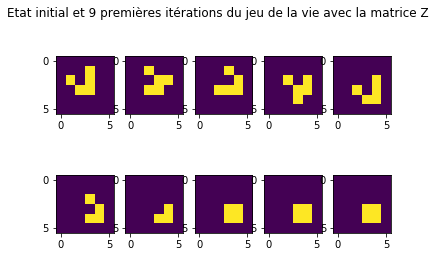

In [6]:
fig, ax = plt.subplots(2, 5)
ax[0][0].imshow(np.array(Z))
for i in range(1, 10):
    iteration_jeu(Z)
    A = np.array(Z)
    # On veut que les itérations soient affichées dans l'ordre, les 4 premières (ainsi que l'état initial) doivent donc être affichées sur la ligne 0 et les suivantes sur la ligne 1:
    if i <= 4:
        ax[0][i].imshow(A)
    else:
        ax[1][i-5].imshow(A)
fig.suptitle(
    "Etat initial et 9 premières itérations du jeu de la vie avec la matrice Z")
plt.show()

# Les cases affichées en violet sont "mortes" (valeur=0), celles en jaunes sont "vivantes" (valeur=1)

Question 6:

Entre l'itération 0 et l'itération 4, il y a le même nombre de cellules vivantes (5).
Après la 7ème itération, le jeu ne bouge plus car il n'y a que quatre cellules vivantes et elles sont collées donc chacune a 3 voisins, ce qui implique que les cellules restent vivantes d'une itération à l'autre et que le jeu n'évolue plus.

Exercice 2:
Question 7:

In [7]:
vect = np.array([0, 1, 0, 0, 1, 1])
# On crée un vecteur de la même taille que vect:
nb_vect = np.zeros(vect.shape)
# Tous les élements de coordonnée i (i allant de 1 à n-2, où n est la longueur du vecteur) de ce nouveau vecteur sont remplacés par la somme des valeurs à gauche et à droite de l'élement de coordonnée i du vecteur vect.
nb_vect[1:-1] += (vect[:-2] + vect[2:])

# Le vecteur nb_vect donne, pour chaque élement du vecteur vect (sauf les extrémités), son nombre de voisins vivants (équivalent de la matrice N dans les programmes précédents mais sous forme de vecteur)

Question 8:

In [8]:
def calcul_nb_voisins_np(Z):
    # On crée une matrice M de la même taille que Z:
    M = np.zeros((np.shape(Z)[0], np.shape(Z)[1]))
    # Pour chaque élement de Z, on va calculer son nombre de voisins en 4 étapes:
    for x in range(1, np.shape(Z)[0] - 1):
        for y in range(1, np.shape(Z)[1] - 1):
            # On commence par la ligne qui contient l'élement de coordonnée (x,y):
            vect1 = np.array(Z[x])
            nb_vect1 = np.zeros(np.shape(Z)[0])
            nb_vect1[1:-1] += (vect1[:-2] + vect1[2:])
            vect1 = nb_vect1
            # On refait la même chose avec la colonne qui contient l'élement de coordonnée (x,y):
            vect2 = np.array(Z[:, y])
            nb_vect2 = np.zeros(np.shape(Z)[1])
            nb_vect2[1:-1] += (vect2[:-2] + vect2[2:])
            vect2 = nb_vect2
            # Certains voisins n'ont pas encore été pris en compte, il faut refaire les mêmes opérations sur les lignes juste avant et juste après celle qui contient l'élement de coordonnée (x,y):
            vect3 = np.array(Z[x-1])
            nb_vect3 = np.zeros(np.shape(Z)[0])
            nb_vect3[1:-1] += (vect3[:-2] + vect3[2:])
            vect3 = nb_vect3
            vect4 = np.array(Z[x+1])
            nb_vect4 = np.zeros(np.shape(Z)[0])
            nb_vect4[1:-1] += (vect4[:-2] + vect4[2:])
            vect4 = nb_vect4
            # Le nombre de voisins de la cellule de coordonnée (x,y) est la somme d'un élement de chaque vecteur. Cette somme devient la valeur de la cellulle de coordonée (x,y) de la matrice M
            M[x, y] = np.sum([vect1[y], vect2[x], vect3[y], vect4[y]])
    # La matrice M contient le nombre de voisins de chaque cellule, on la renvoie à la fin de la fonction:
    return(M)

Question 9:

In [9]:
def iteration_jeu_np(Z):
    M = calcul_nb_voisins_np(Z)
    # Chaque élement du np.array Z (sauf le pourtour) est remplacé par son état à l'étape suivante du jeu en reprenant les règles données par l'énoncé:
    for x in range(1, np.shape(Z)[0]-1):
        for y in range(1, np.shape(Z)[1]-1):
            if Z[x, y] == 1 and (M[x, y] < 2 or M[x, y] > 3):
                Z[x, y] = 0
            elif Z[x, y] == 0 and M[x, y] == 3:
                Z[x, y] = 1
    return(Z)

Question 10:

In [10]:
def jeu_np(Z_in, nb_iter):
    # On crée une matrice de même taille que Z_in qui ne contient pour l'instant que des zéros:
    Z = np.zeros((np.shape(Z_in)[0], np.shape(Z_in)[1]))
    # On va relancer la fonction iteration_jeu_np jusqu'à ce que l'on ait atteint le nombre d'itérations souhaité:
    for i in range(1, nb_iter+1):
        iteration_jeu_np(Z_in)
        # On stocke le résultat dans la matrice Z:
        Z = Z_in
    # En sortie de boucle, on renvoie l'état de Z après le nombre d'itérations choisi:
    return(Z)

Question 11:

In [11]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

<IPython.core.display.Javascript object>


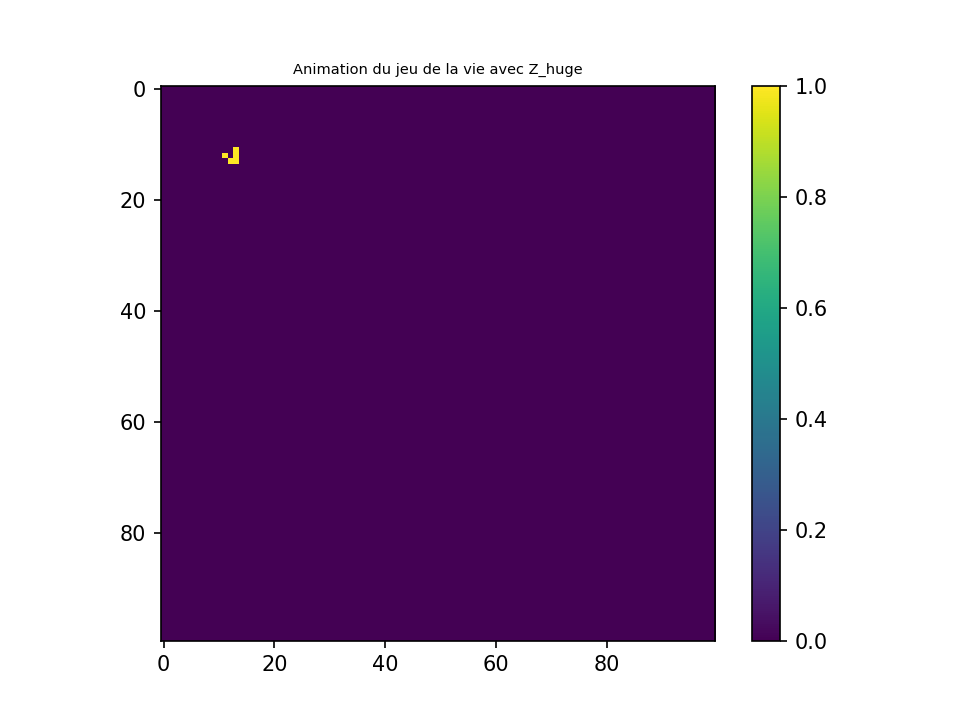

In [12]:
# On va se servir du fichier utils pour changer la taille de police du titre de la figure:
from cindydelageutils import police
%matplotlib notebook

fig = plt.figure()
# On commencera par afficher l'état initial de la matrice:
im = plt.imshow(Z_huge)


def animate(i):
    # On lance le jeu de la vie une fois à chaque lancement de la fonction:
    jeu_np(Z_huge, 1)
    # On affiche la matrice obtenue:
    im = plt.imshow(Z_huge)
    # C'est l'image qui doit être animée donc on la renvoie:
    return im,


plt.title("Animation du jeu de la vie avec Z_huge", fontsize=police())
plt.colorbar()
anim = animation.FuncAnimation(fig, animate, 9, interval=10, blit=True)
plt.show()

# Les cellules vivantes sont en jaune, les mortes en violet (voir la barre à droite de l'image) :

Question 12:

<IPython.core.display.Javascript object>


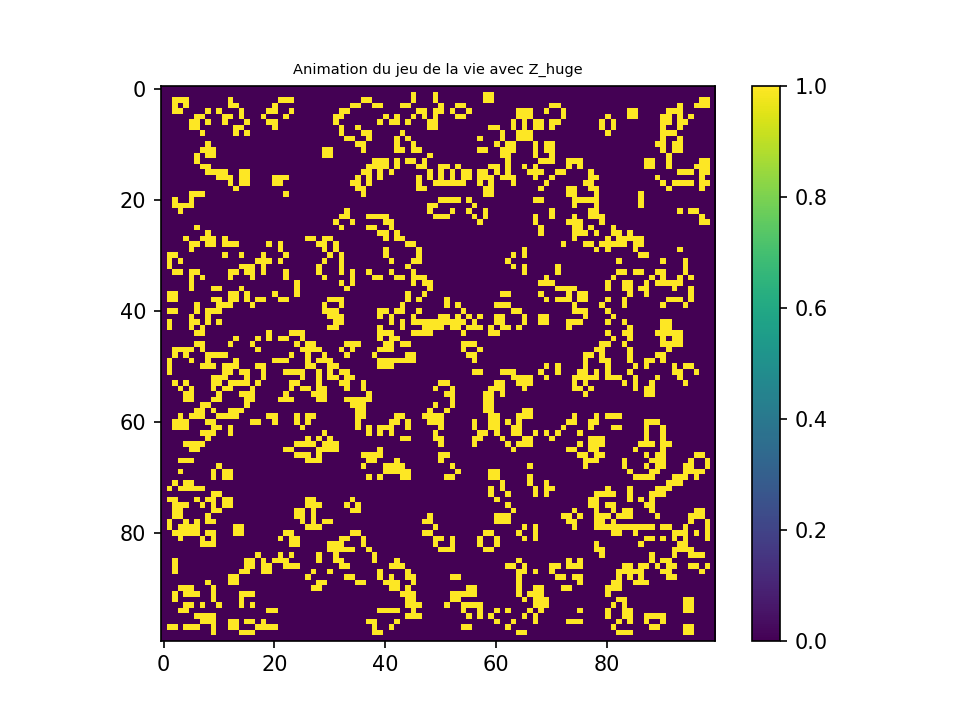

In [13]:
# On va sauvegarder l'animation crée (cela ne marchera pas si ffmpeg n'est pas installé sur l'ordinateur):
from cindydelageutils import sauvegarde

Z_huge = np.zeros((100, 100))
# Pour qu'il n'y ait pas de 1 sur le pourtour, on créer une matrice de taille (98,98) qui contiendra la proportion de 1 voulue:
Z = np.random.binomial(1, (1 + ma_graine) * 10 / 100, size=(98, 98))
# On incorpore cette matrice dans Z_huge:
Z_huge[1:np.shape(Z_huge)[1]-1, 1:np.shape(Z_huge)[0]-1] = Z
fig = plt.figure()
im = plt.imshow(Z_huge)


def animate(i):
    jeu_np(Z_huge, 1)
    im = plt.imshow(Z_huge)
    return im,


plt.title("Animation du jeu de la vie avec Z_huge", fontsize=police())
anim = animation.FuncAnimation(fig, animate, 9, blit=False)
plt.colorbar()
sauvegarde(anim)
plt.show()

# Les cases affichées en violet sont "mortes" (valeur=0), celles en jaunes sont "vivantes" (valeur=1) (voir barre à droite de l'image)

Question 13:
Voici 3 matrices de configurations stables:

<IPython.core.display.Javascript object>


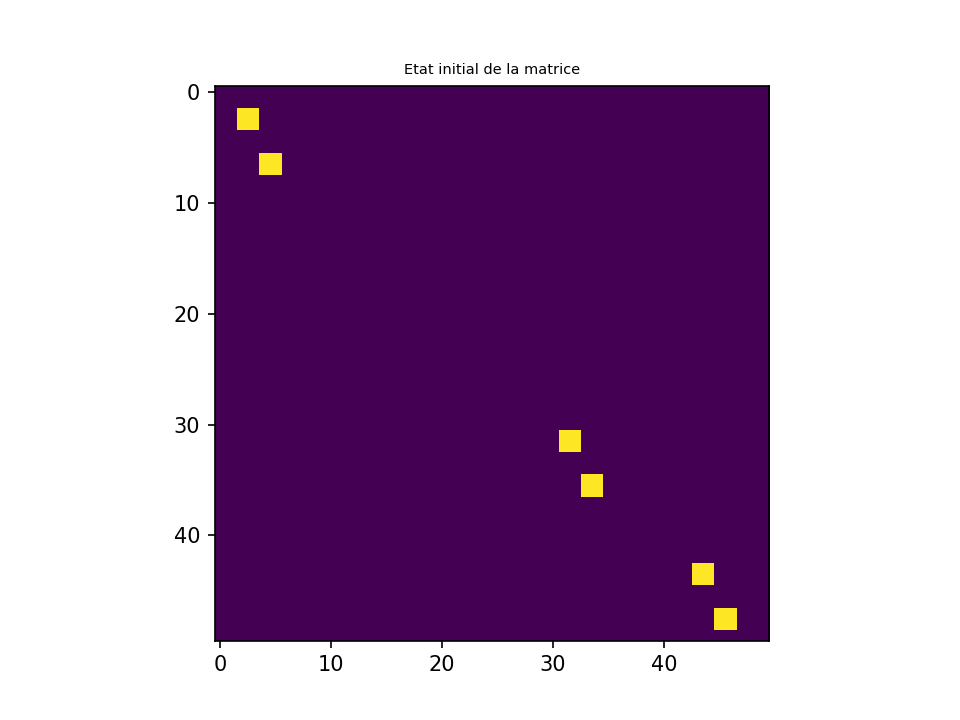

<IPython.core.display.Javascript object>


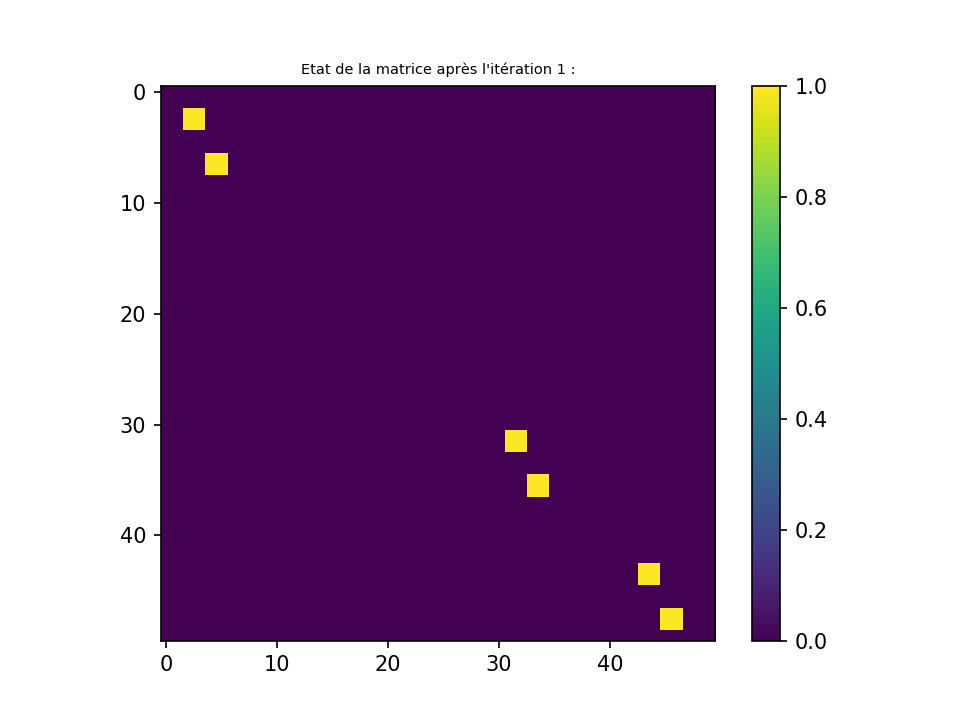

<IPython.core.display.Javascript object>


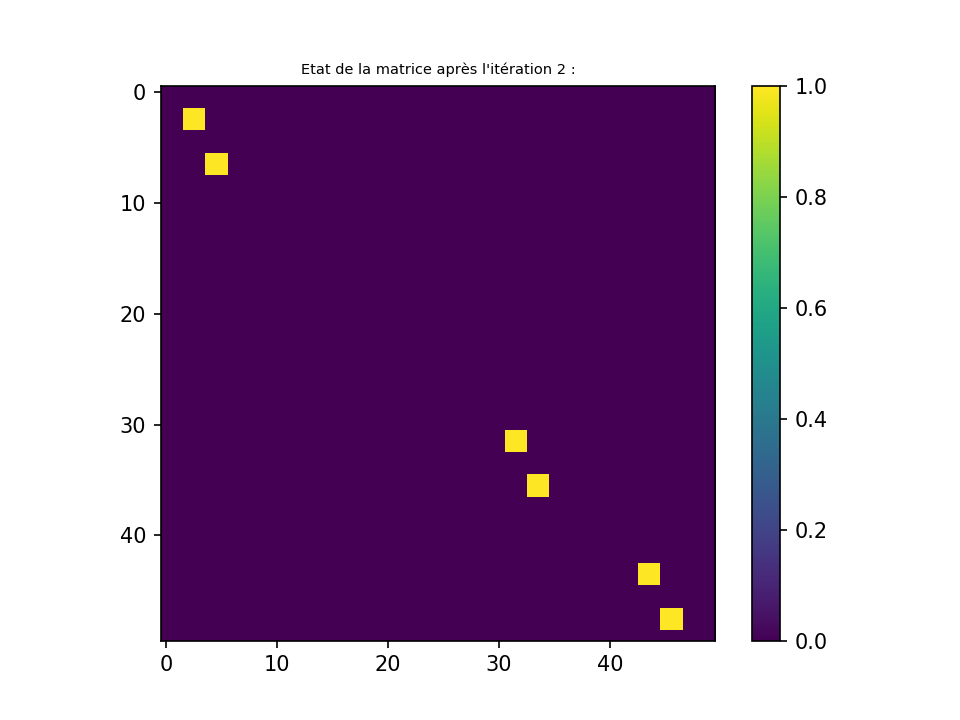

<IPython.core.display.Javascript object>


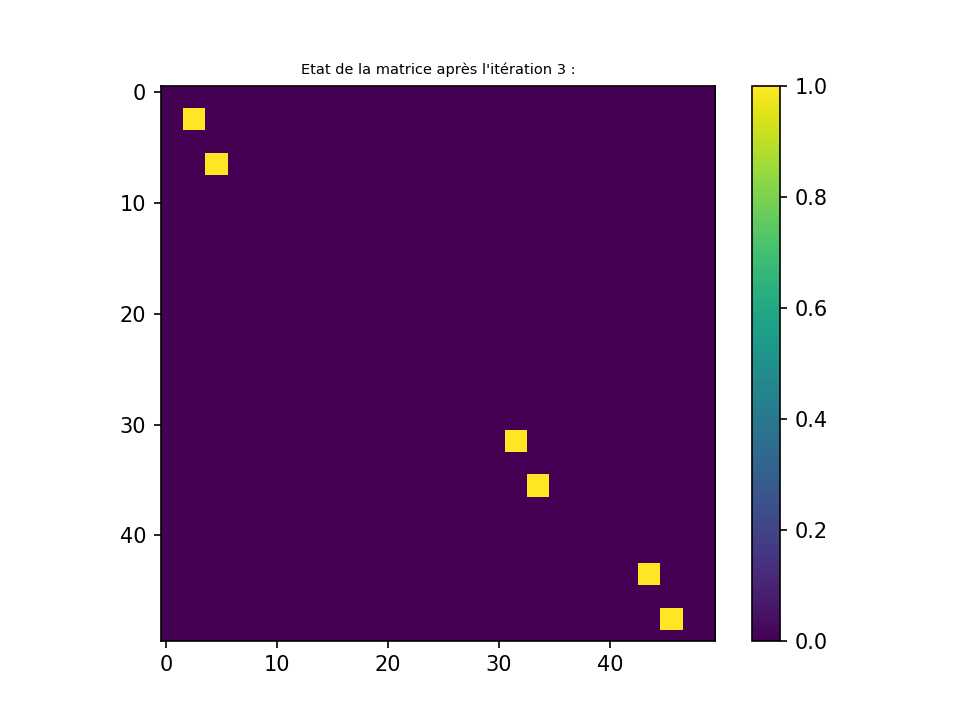

<IPython.core.display.Javascript object>


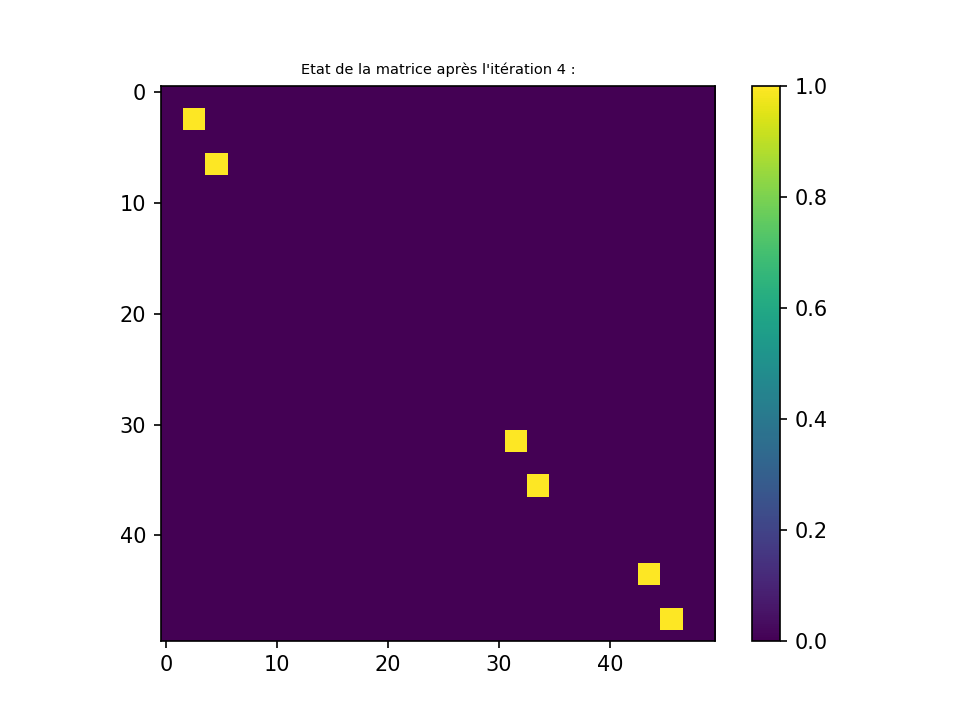

<IPython.core.display.Javascript object>


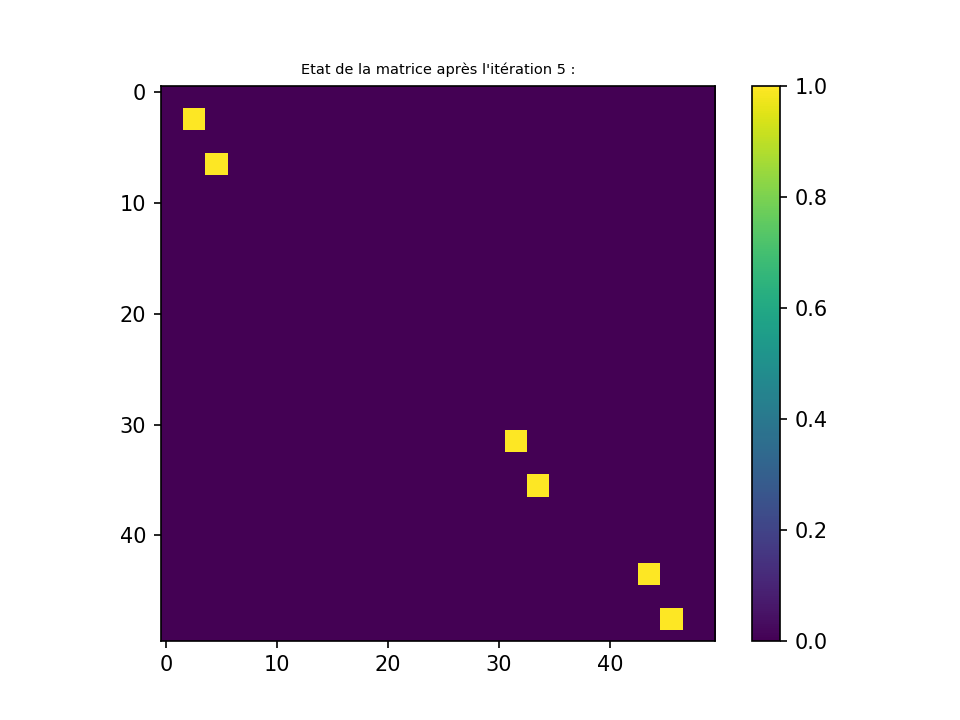

<IPython.core.display.Javascript object>


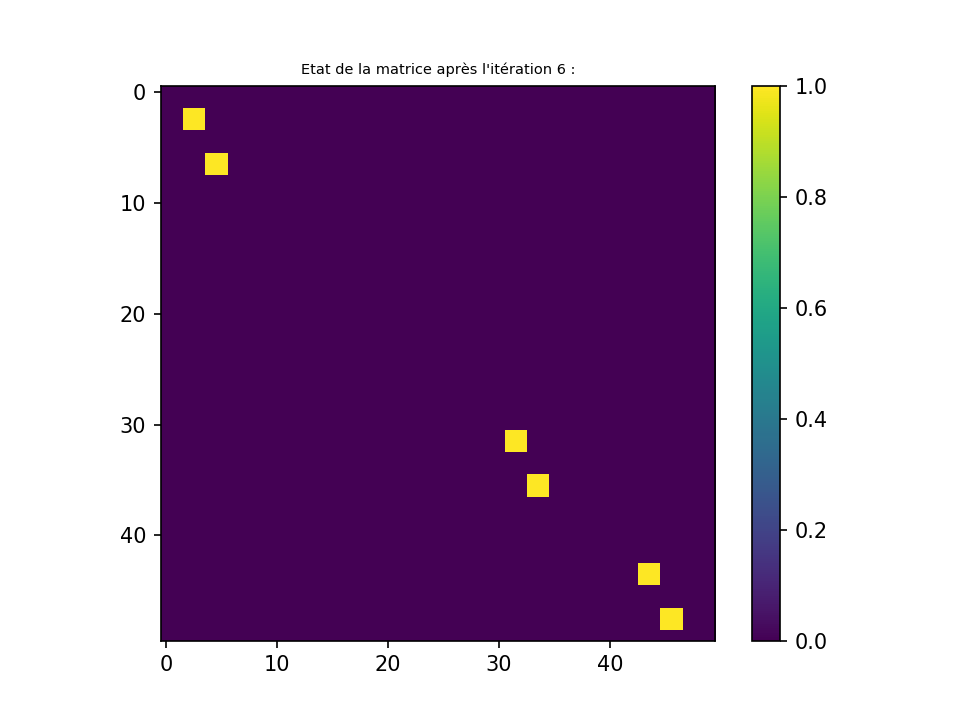

<IPython.core.display.Javascript object>


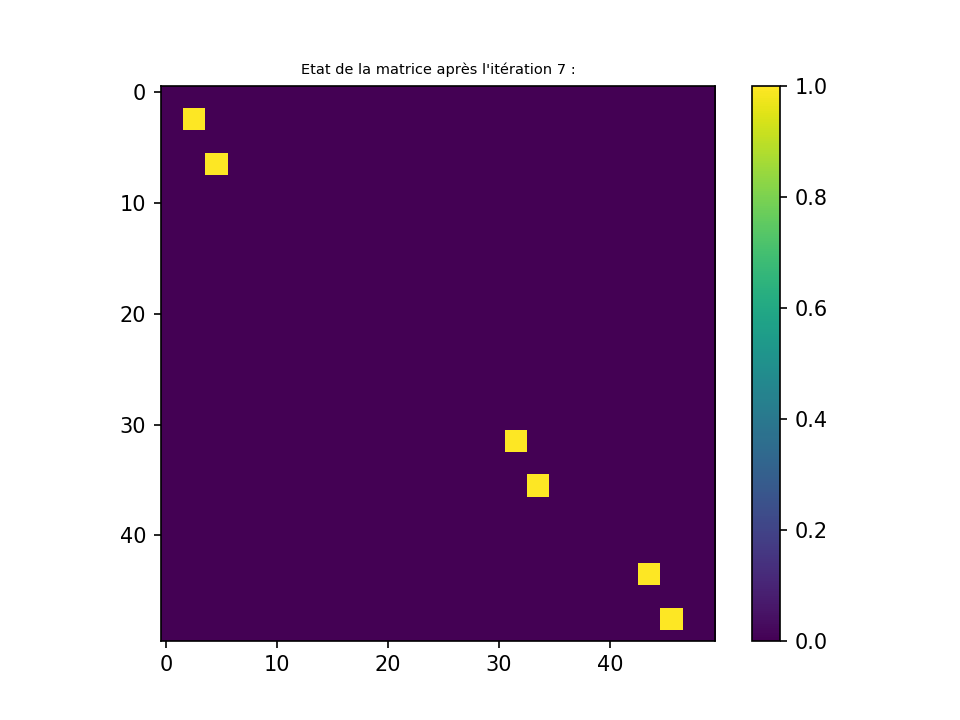

<IPython.core.display.Javascript object>


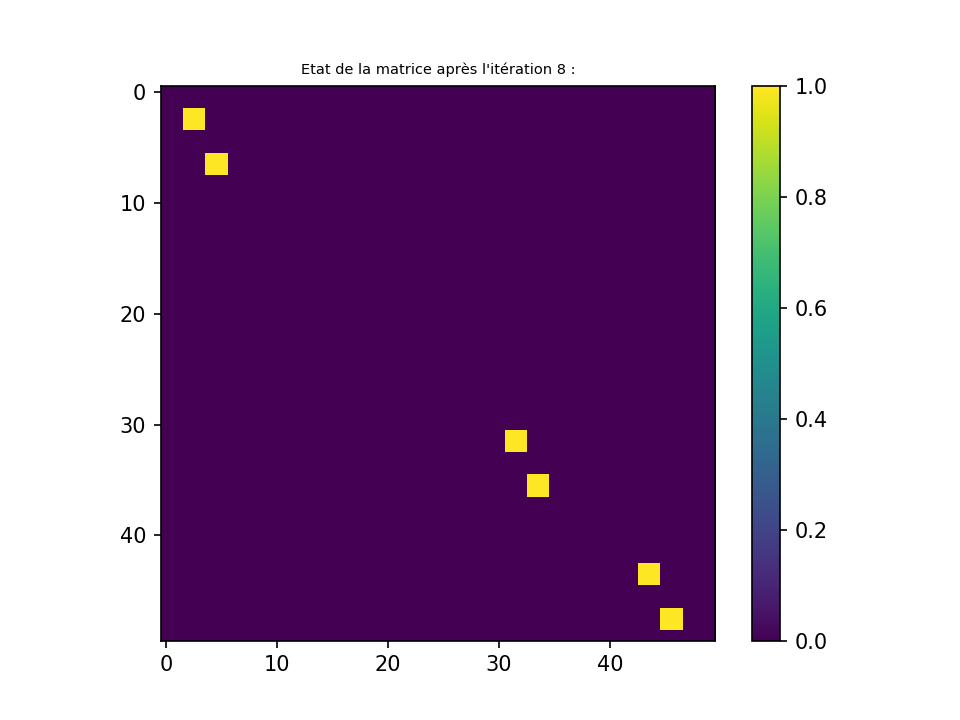

<IPython.core.display.Javascript object>


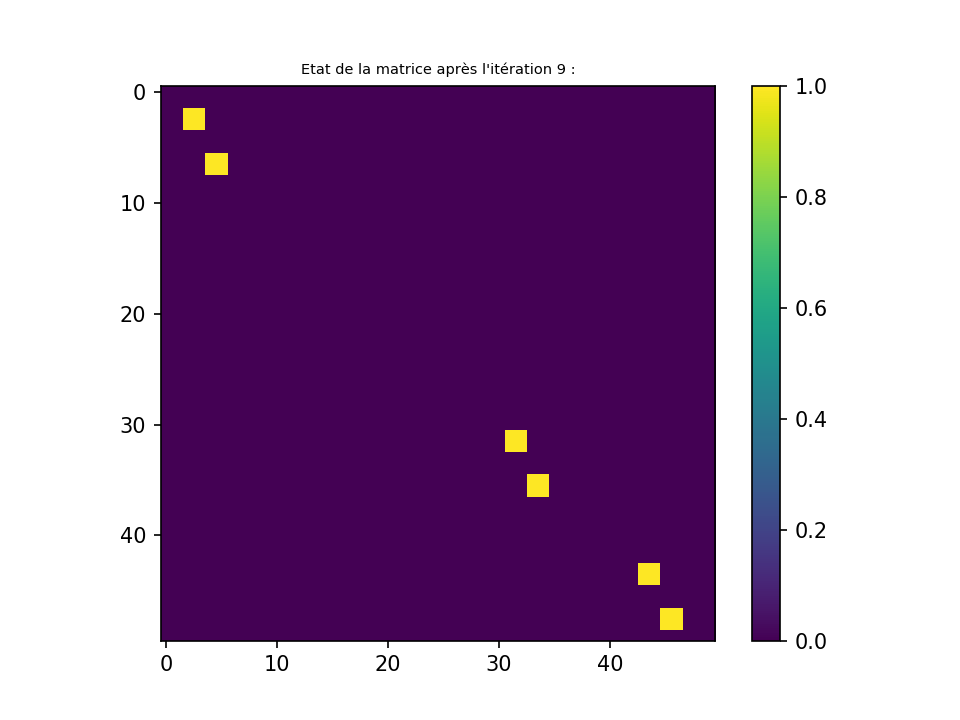

<IPython.core.display.Javascript object>


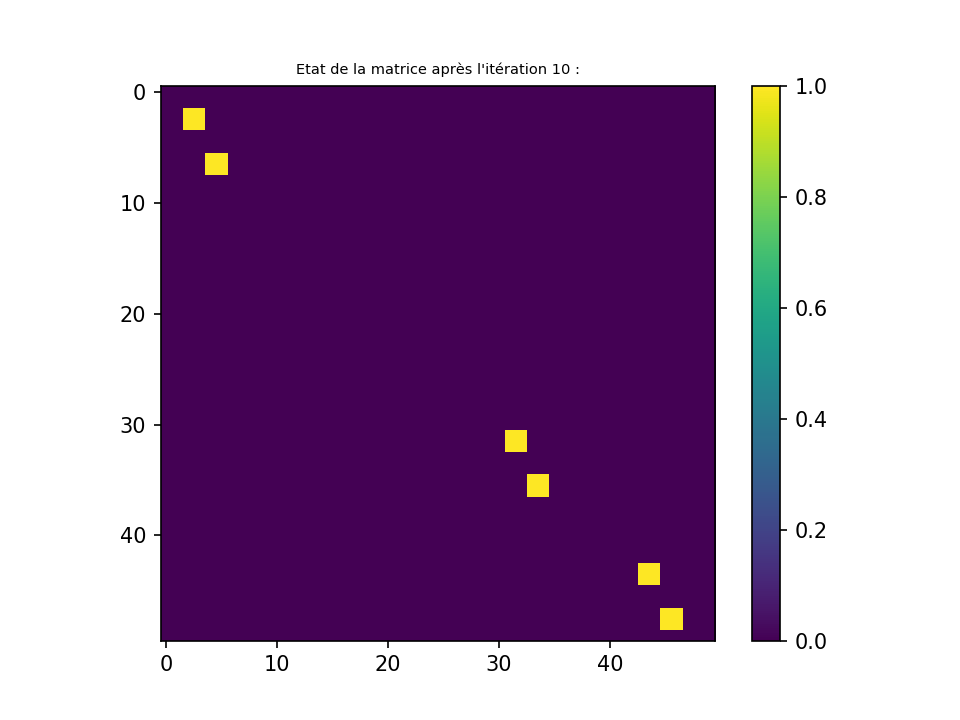

In [14]:
Z_huge = np.zeros((50, 50))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 1, 1, 0, 0, 0],
     [0, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 1, 0],
     [0, 0, 0, 1, 1, 0]])
Z_huge[1:8, 1:7] = Z_np
Z_huge[30:37, 30:36] = Z_np
Z_huge[42:49, 42:48] = Z_np


def imshow_jeu_de_la_vie(Z):
    fig, ax = plt.subplots()
    # On commence par afficher l'état initial de la matrice:
    plt.imshow(np.array(Z))
    plt.title("Etat initial de la matrice", fontsize=police())
    # On va afficher chacune des 10 premières itérations:
    for i in range(1, 11):
        fig, ax = plt.subplots()
        iteration_jeu_np(Z)
        A = np.array(Z)
        plt.imshow(A)
        plt.title("Etat de la matrice après l'itération " +
                  str(i) + " :", fontsize=police())
        plt.colorbar()
        plt.show()


imshow_jeu_de_la_vie(Z_huge)

# Les cases affichées en violet sont "mortes" (valeur=0), celles en jaunes sont "vivantes" (valeur=1)

<IPython.core.display.Javascript object>


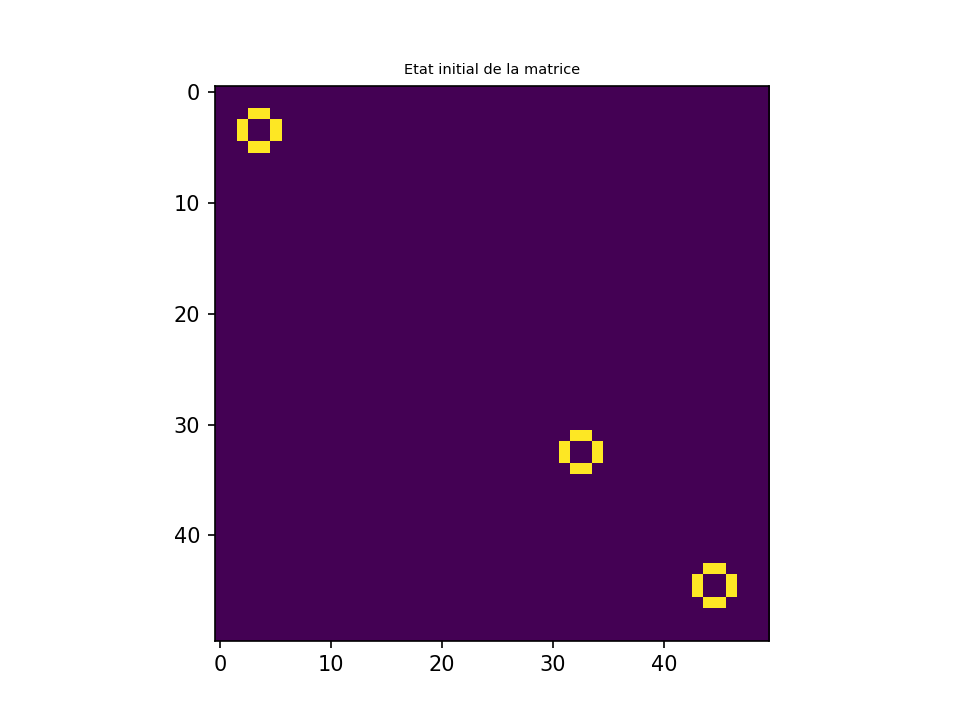

<IPython.core.display.Javascript object>


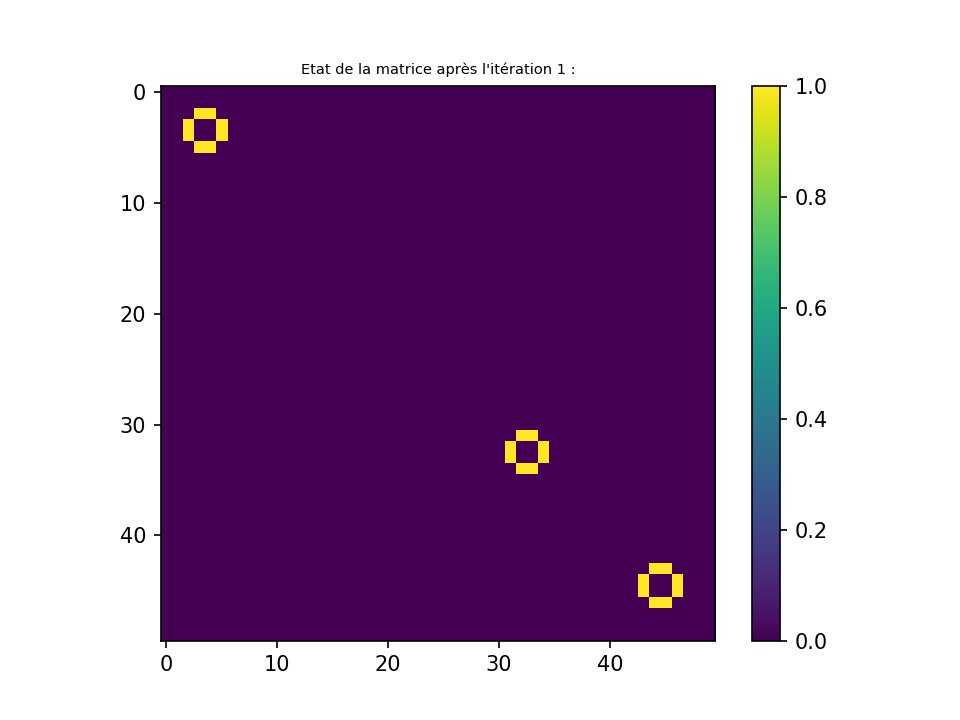

<IPython.core.display.Javascript object>


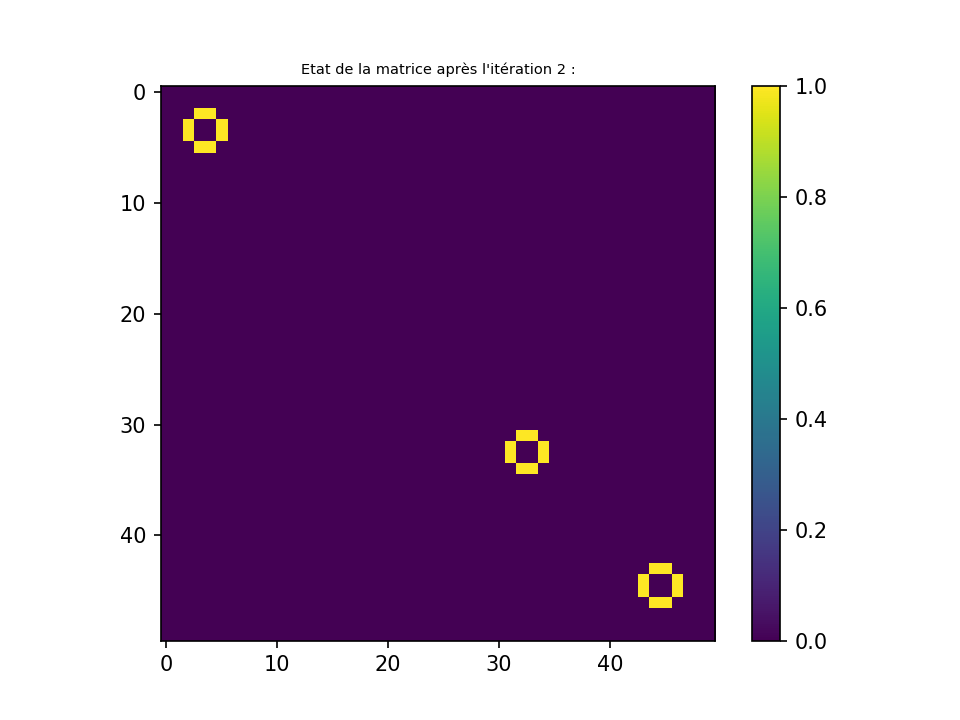

<IPython.core.display.Javascript object>


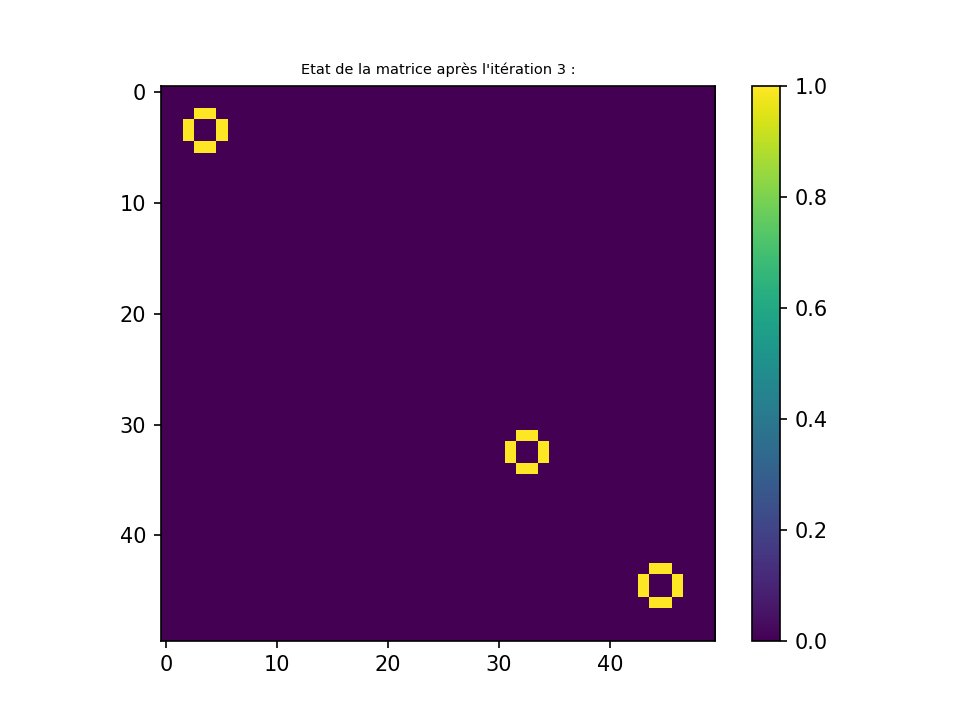

<IPython.core.display.Javascript object>


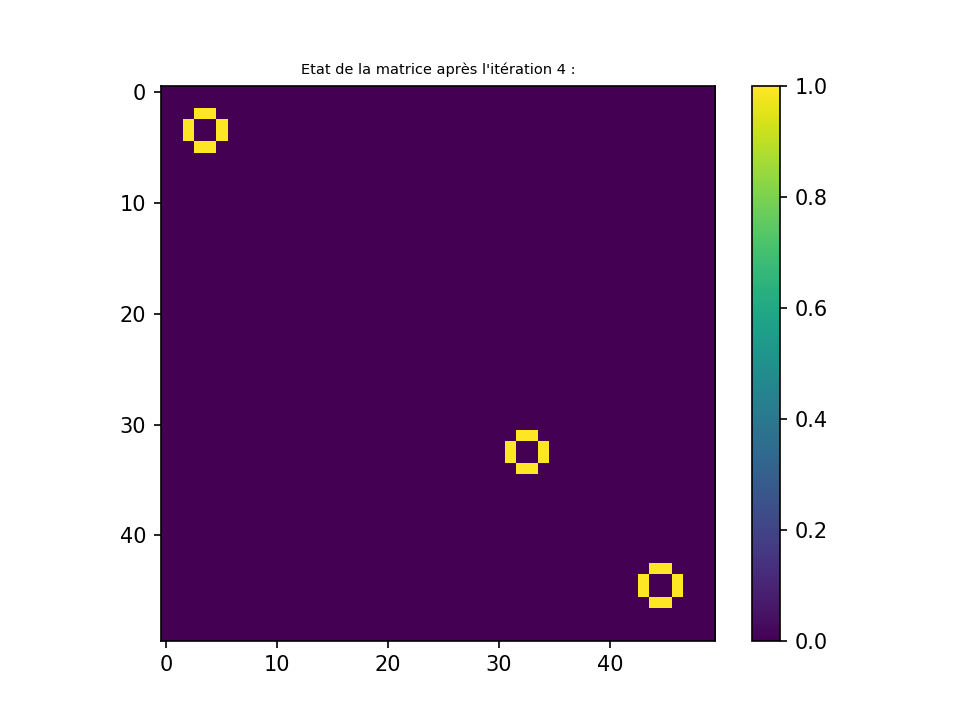

<IPython.core.display.Javascript object>


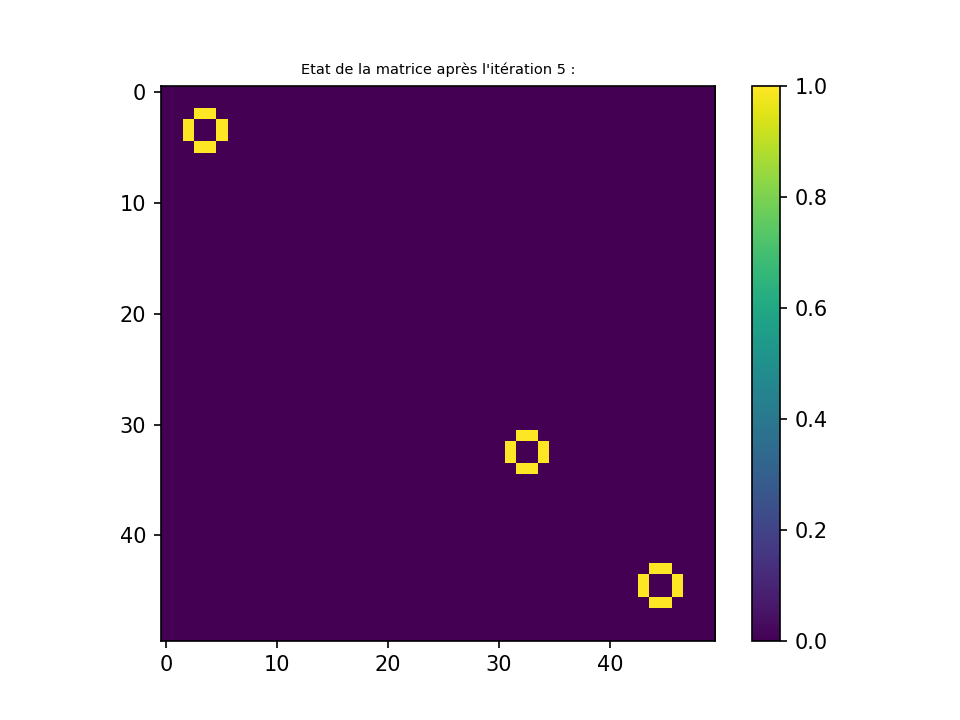

<IPython.core.display.Javascript object>


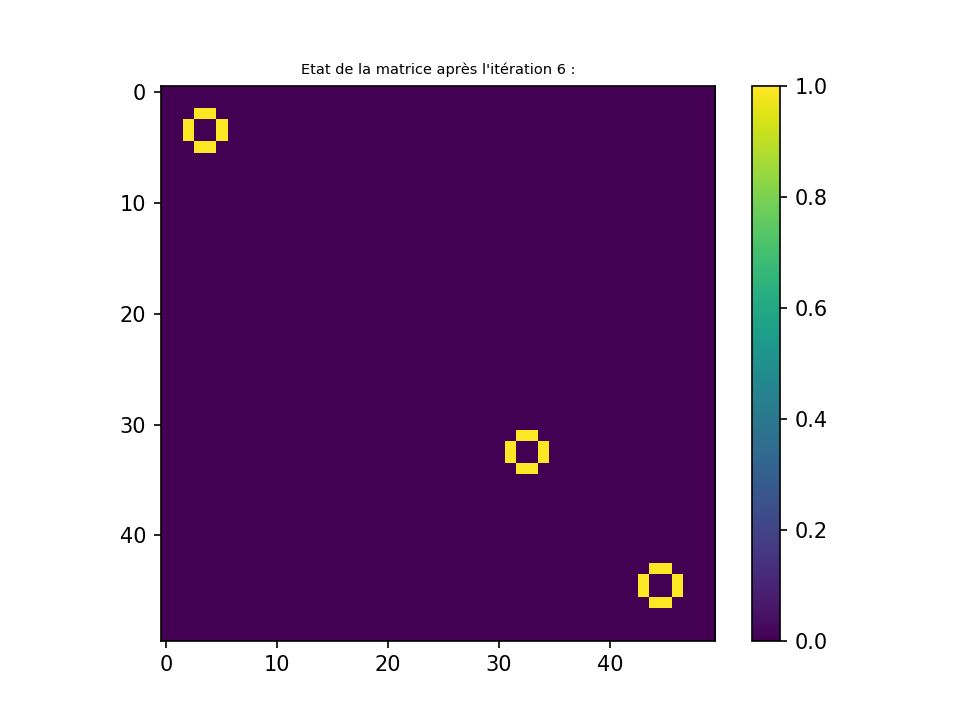

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


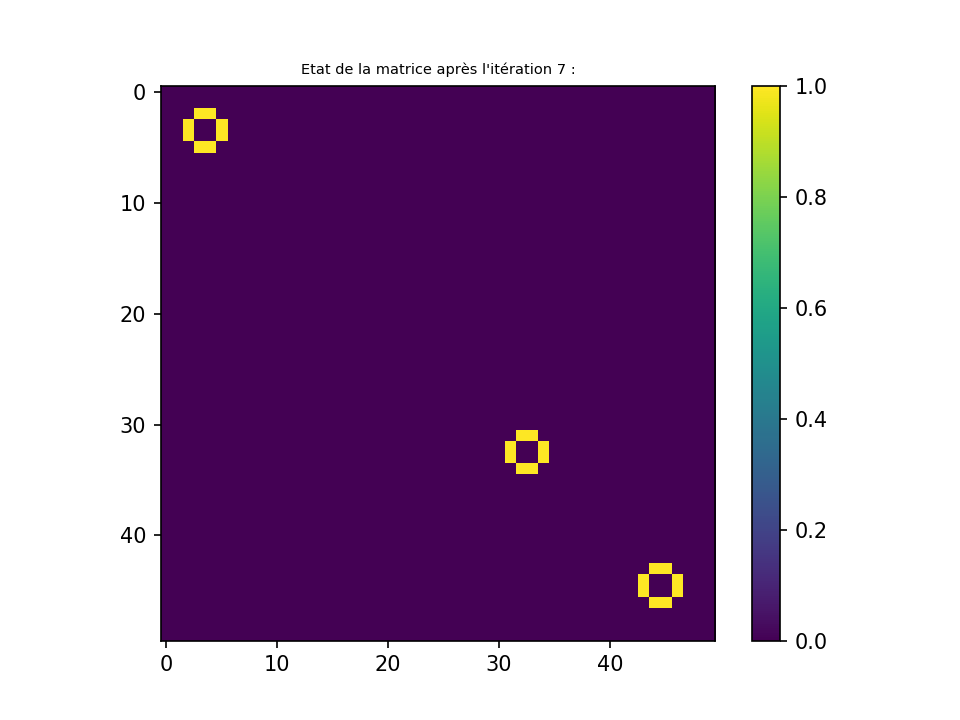

<IPython.core.display.Javascript object>


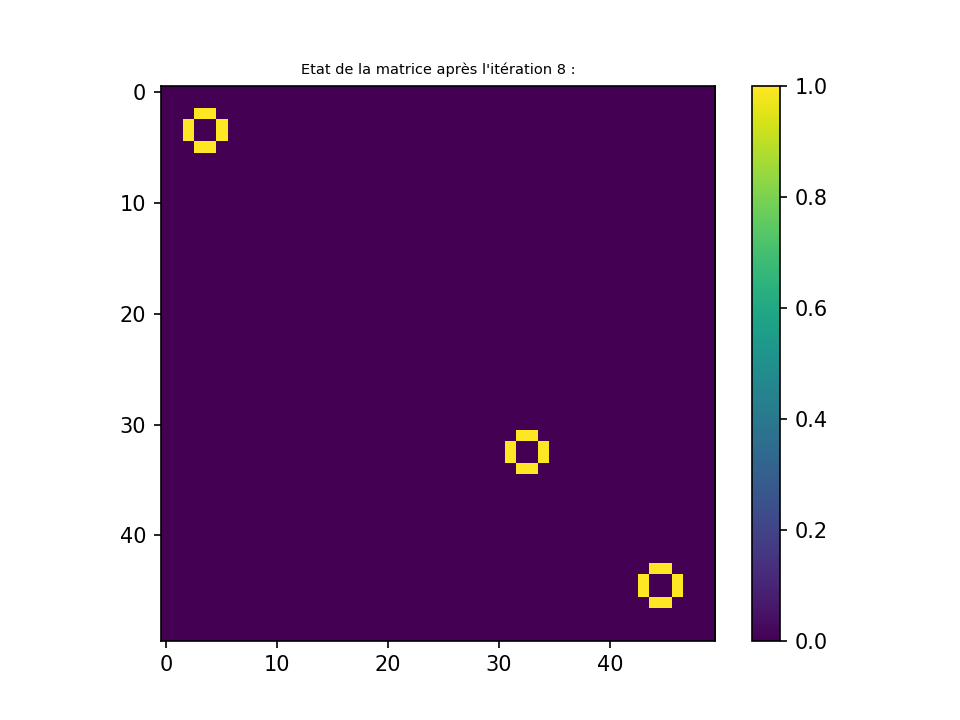

<IPython.core.display.Javascript object>


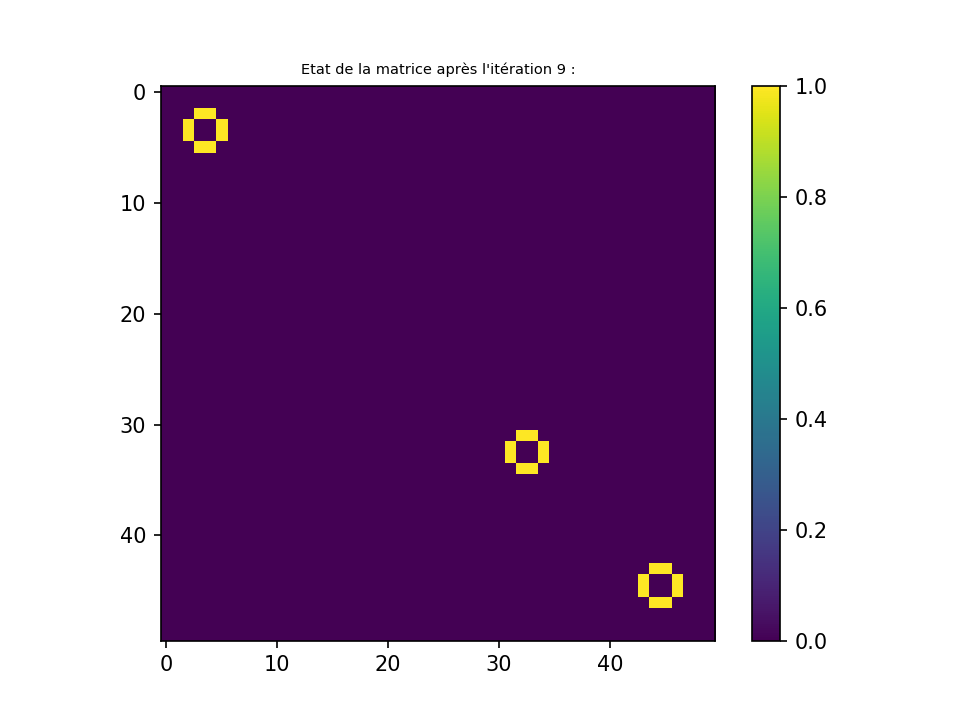

<IPython.core.display.Javascript object>


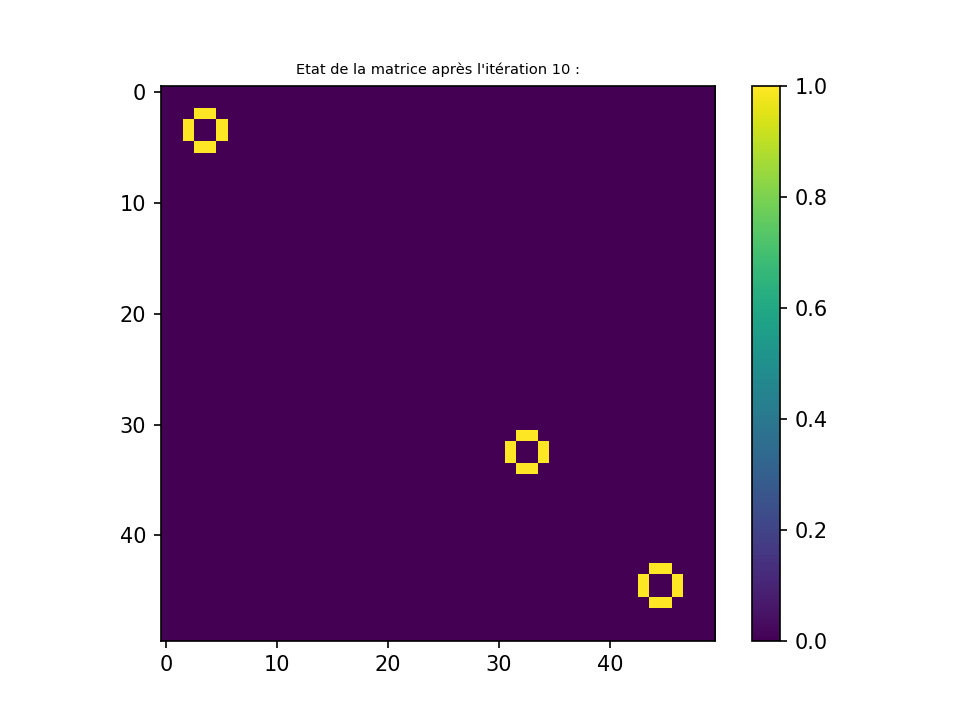

In [15]:
Z_huge = np.zeros((50, 50))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 1, 0, 0, 1, 0],
     [0, 1, 0, 0, 1, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[1:7, 1:7] = Z_np
Z_huge[30:36, 30:36] = Z_np
Z_huge[42:48, 42:48] = Z_np

imshow_jeu_de_la_vie(Z_huge)

# Les cases affichées en violet sont "mortes" (valeur=0), celles en jaunes sont "vivantes" (valeur=1)

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


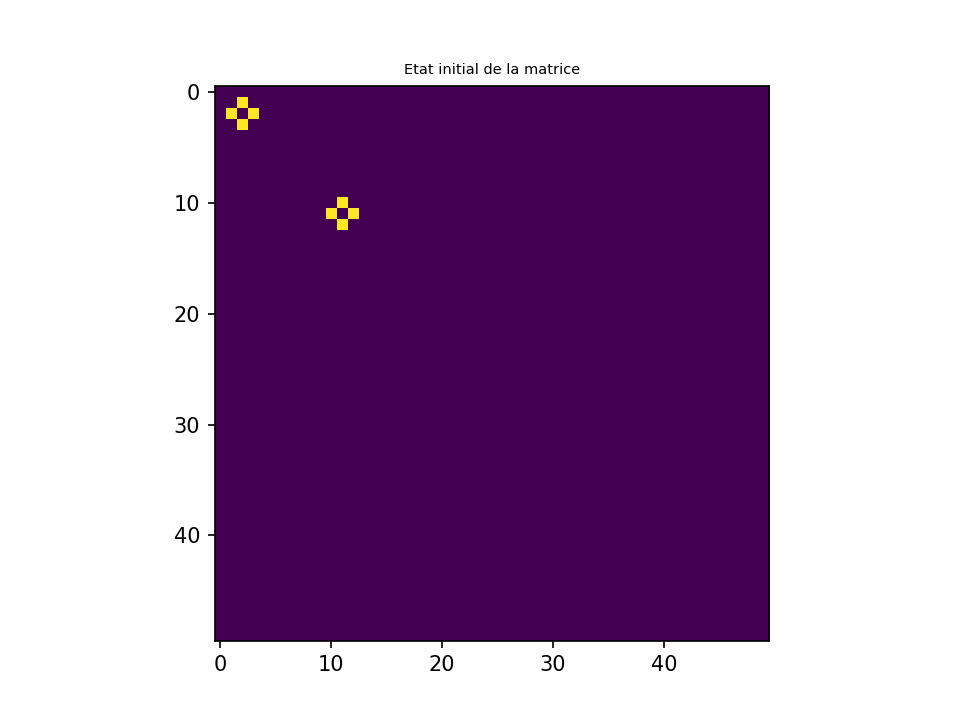

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


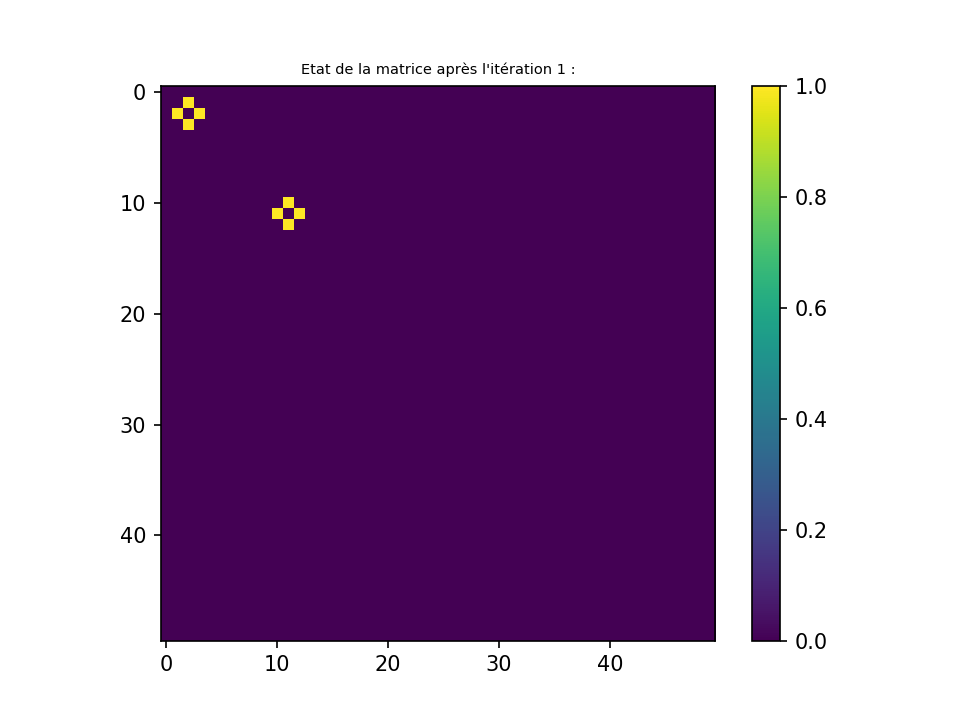

<IPython.core.display.Javascript object>


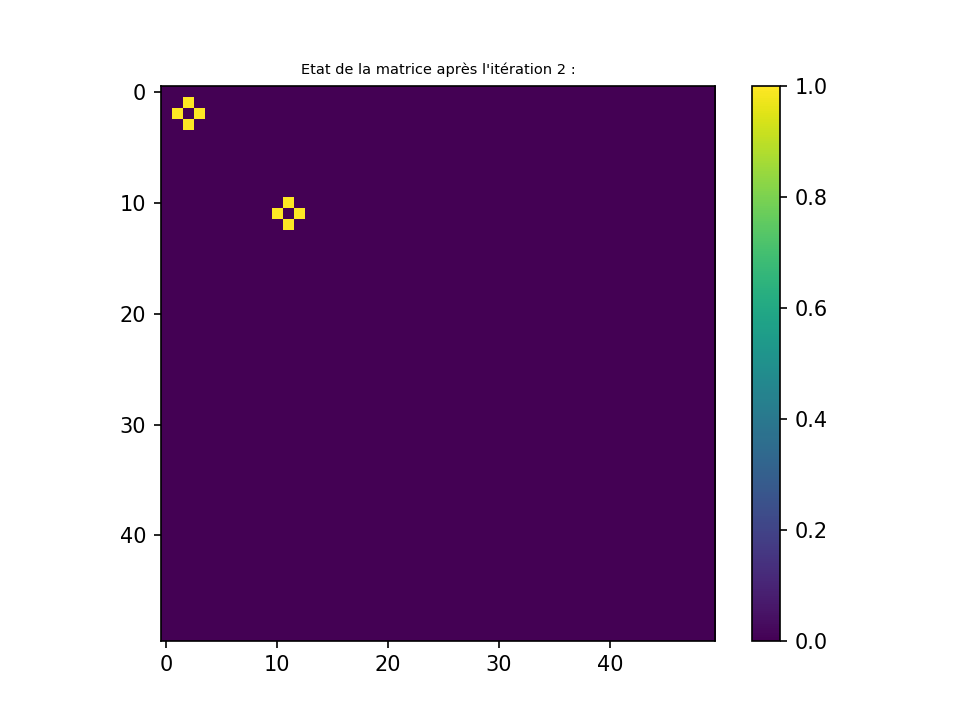

<IPython.core.display.Javascript object>


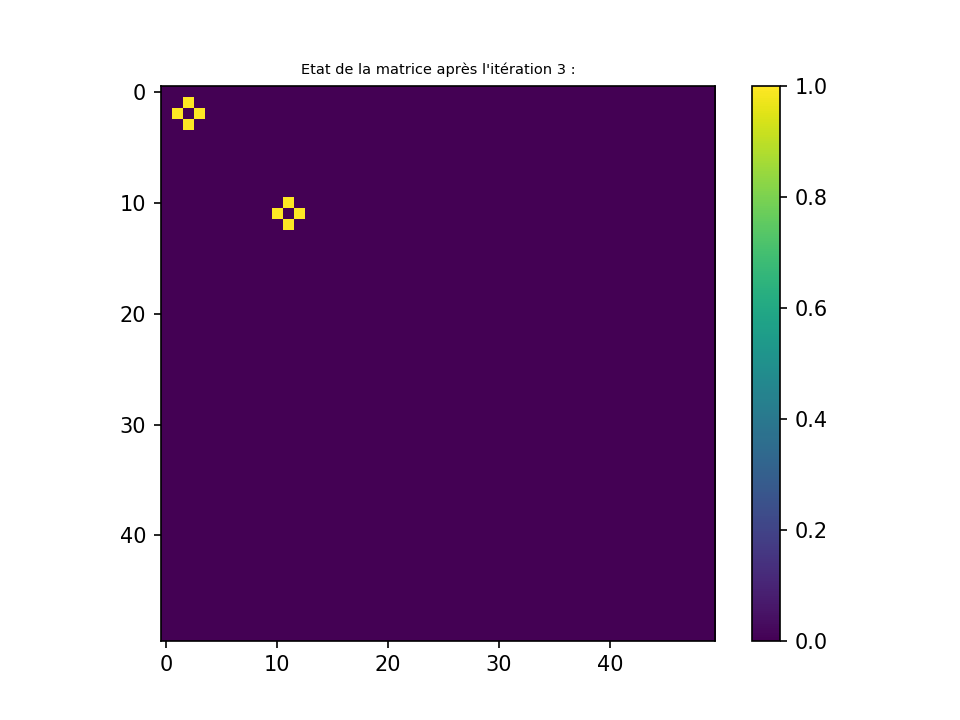

<IPython.core.display.Javascript object>


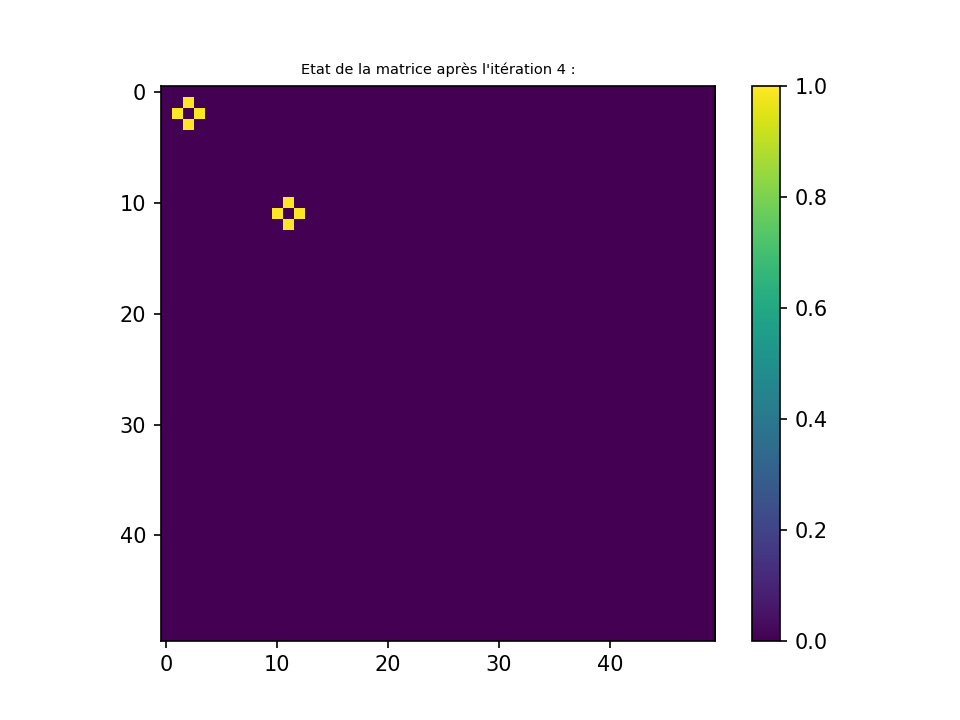

<IPython.core.display.Javascript object>


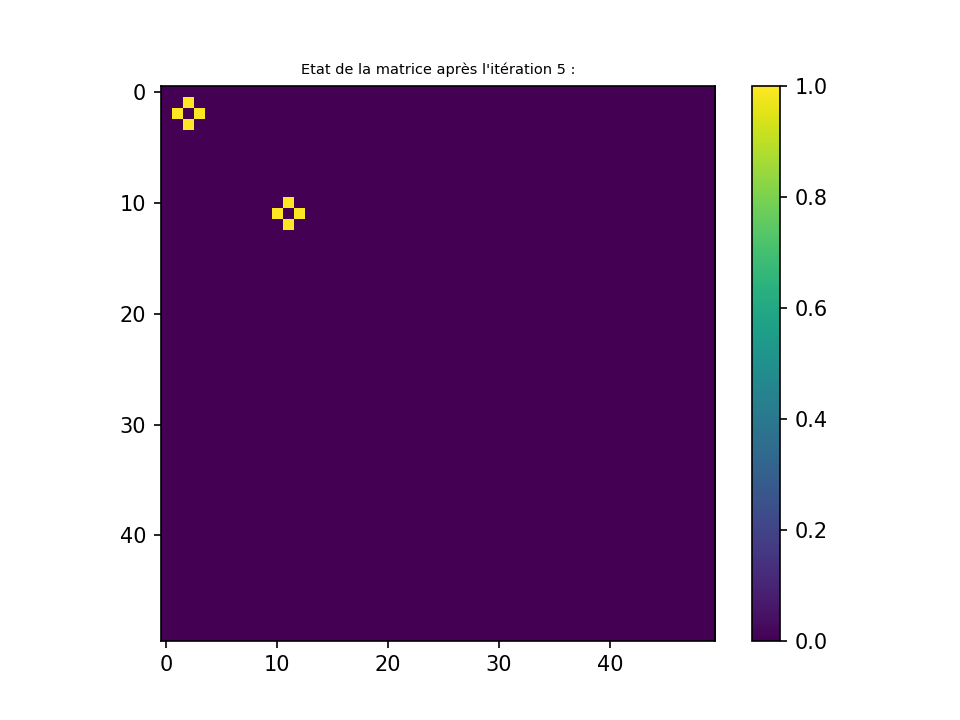

<IPython.core.display.Javascript object>


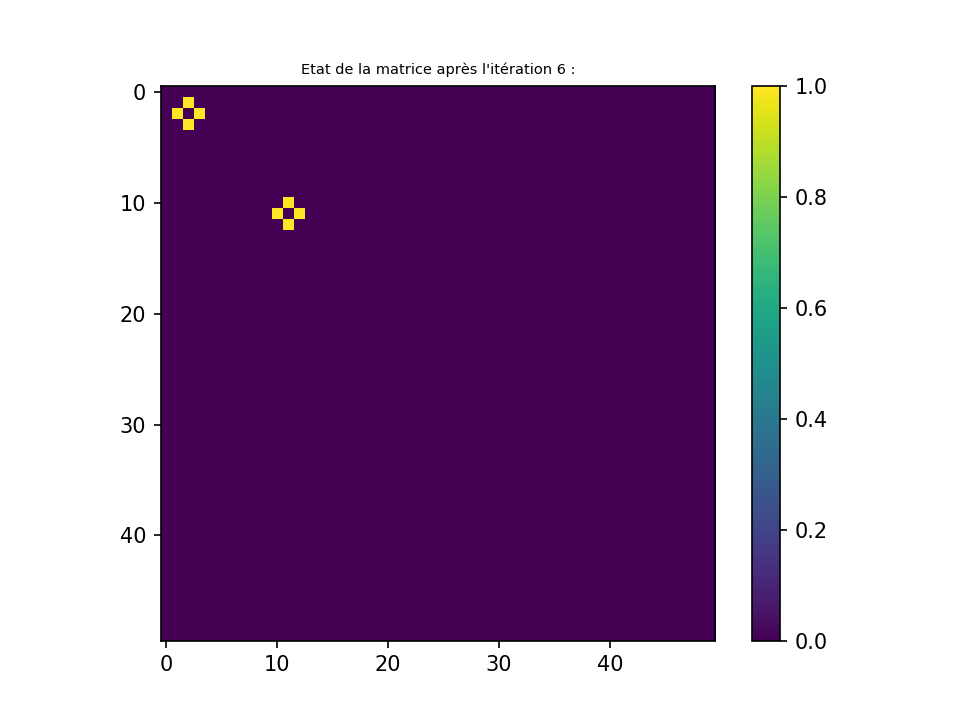

<IPython.core.display.Javascript object>


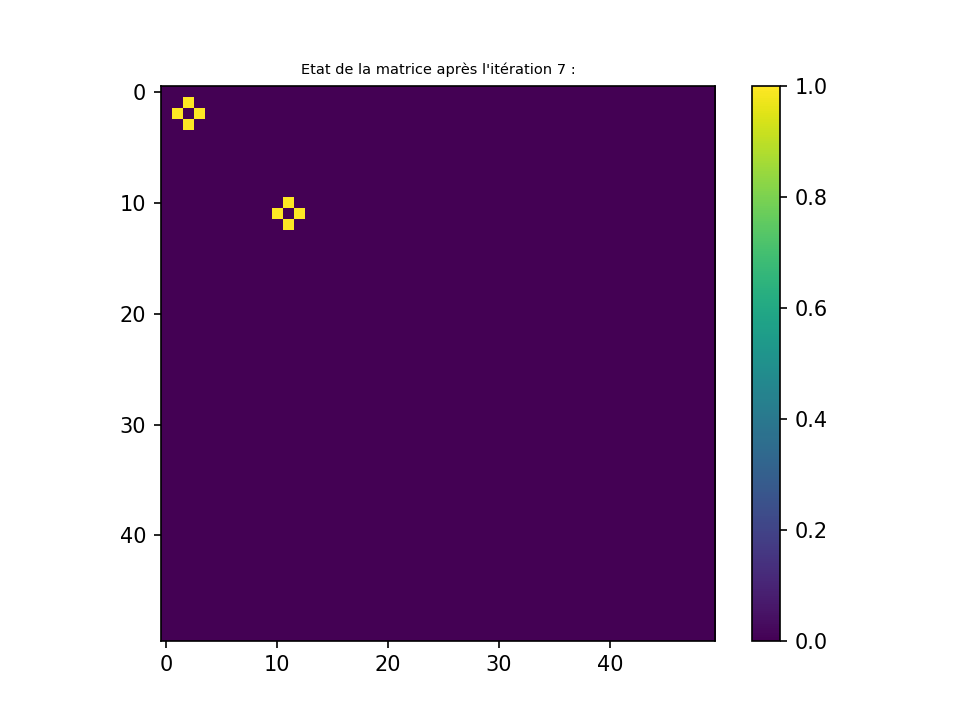

<IPython.core.display.Javascript object>


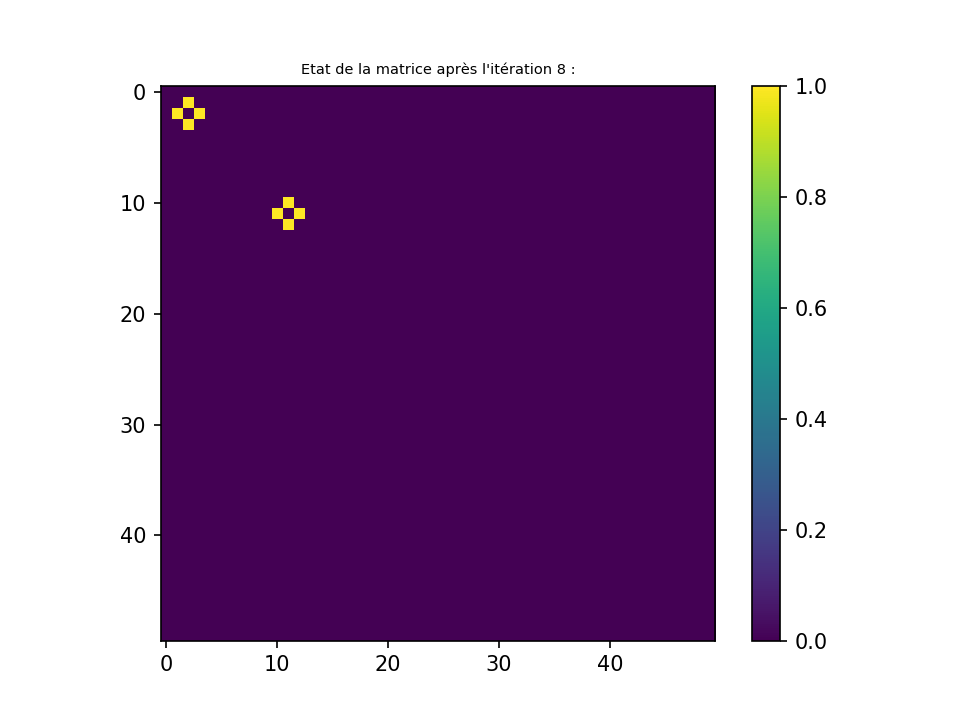

<IPython.core.display.Javascript object>


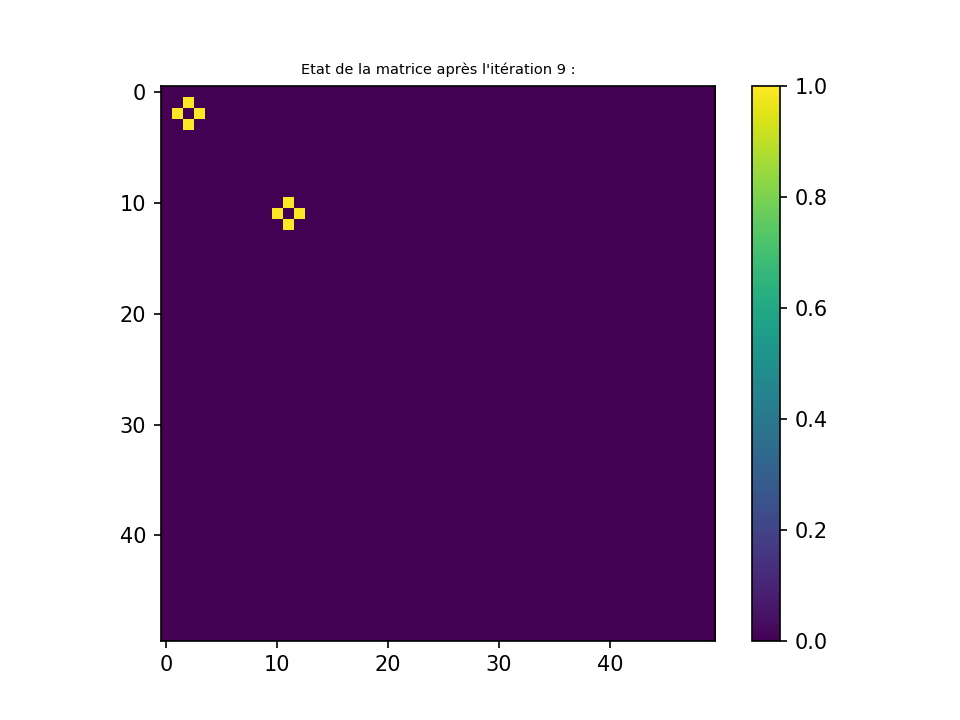

<IPython.core.display.Javascript object>


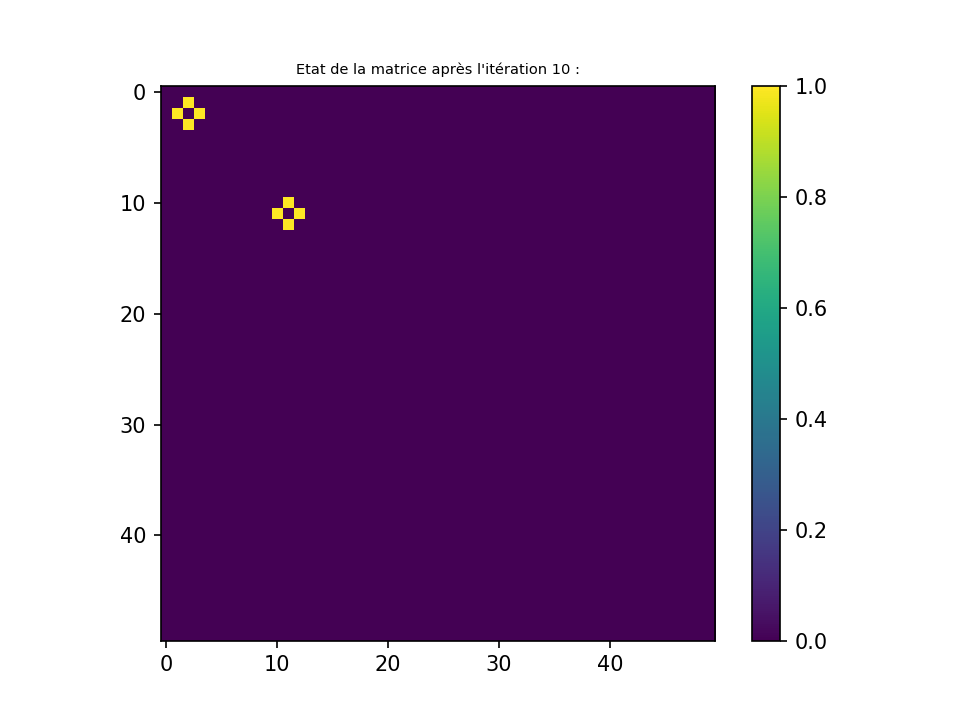

In [16]:
Z_huge = np.zeros((50, 50))
Z_np = np.array(
    [[0, 1, 0],
     [1, 0, 1],
     [0, 1, 0]])
Z_huge[1:4, 1:4] = Z_np
Z_huge[10:13, 10:13] = Z_np

imshow_jeu_de_la_vie(Z_huge)

# Les cases affichées en violet sont "mortes" (valeur=0), celles en jaunes sont "vivantes" (valeur=1)

Voice 1 matrice dont l'état oscille avec une période de 2:

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


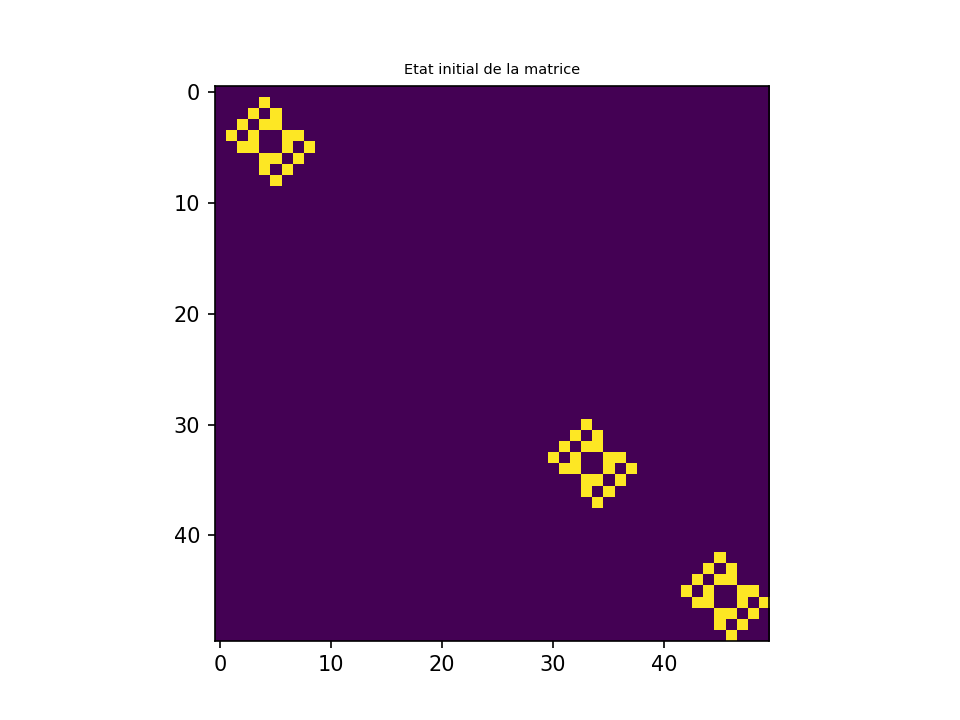

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


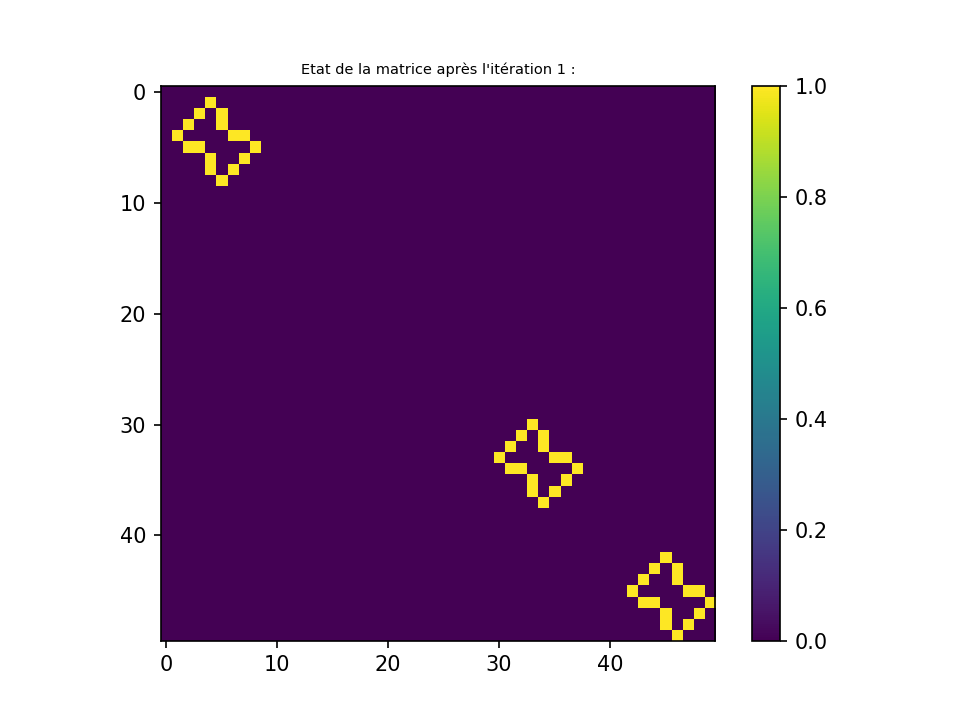

<IPython.core.display.Javascript object>


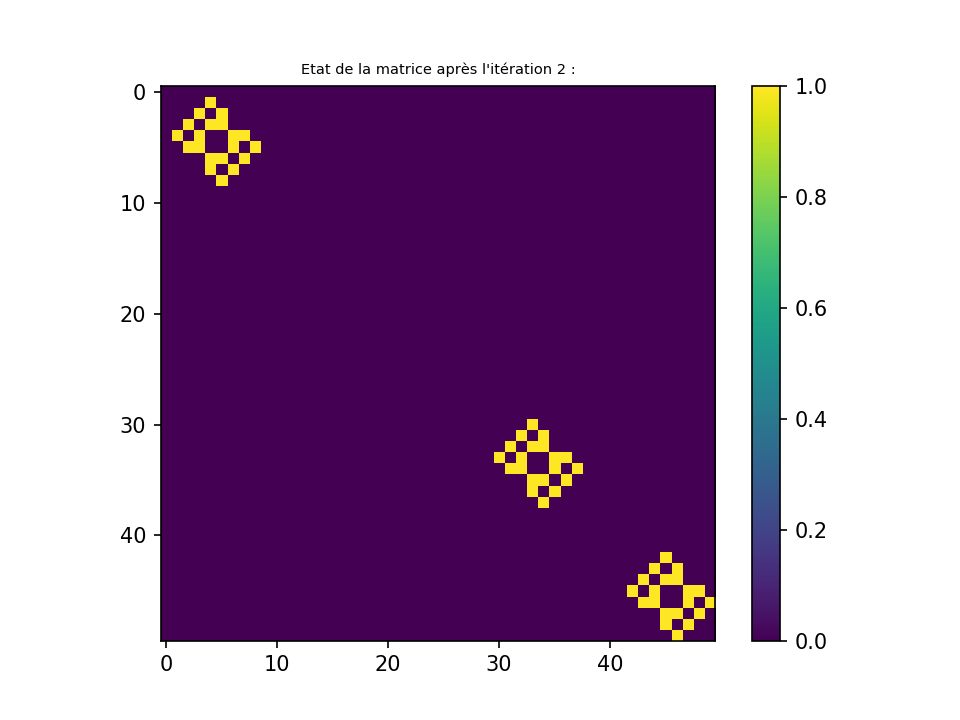

<IPython.core.display.Javascript object>


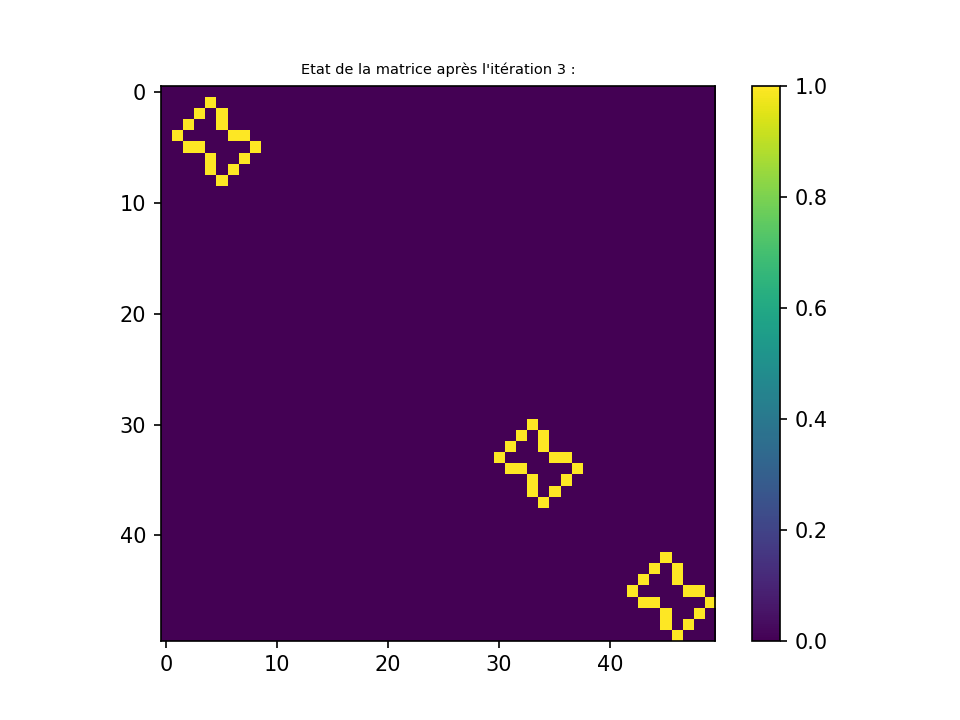

<IPython.core.display.Javascript object>


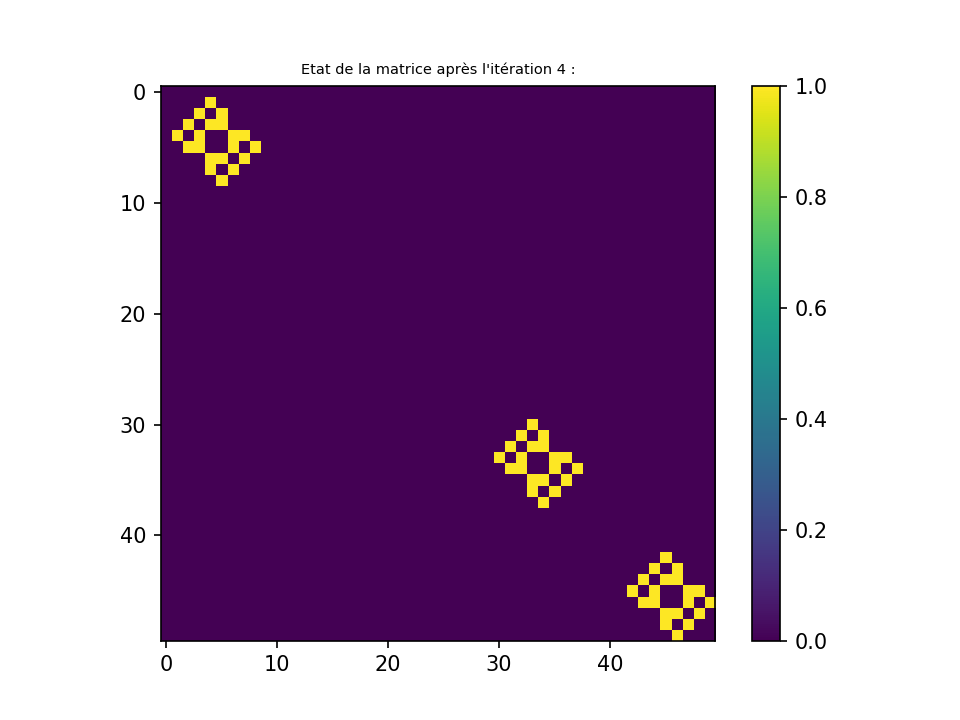

<IPython.core.display.Javascript object>


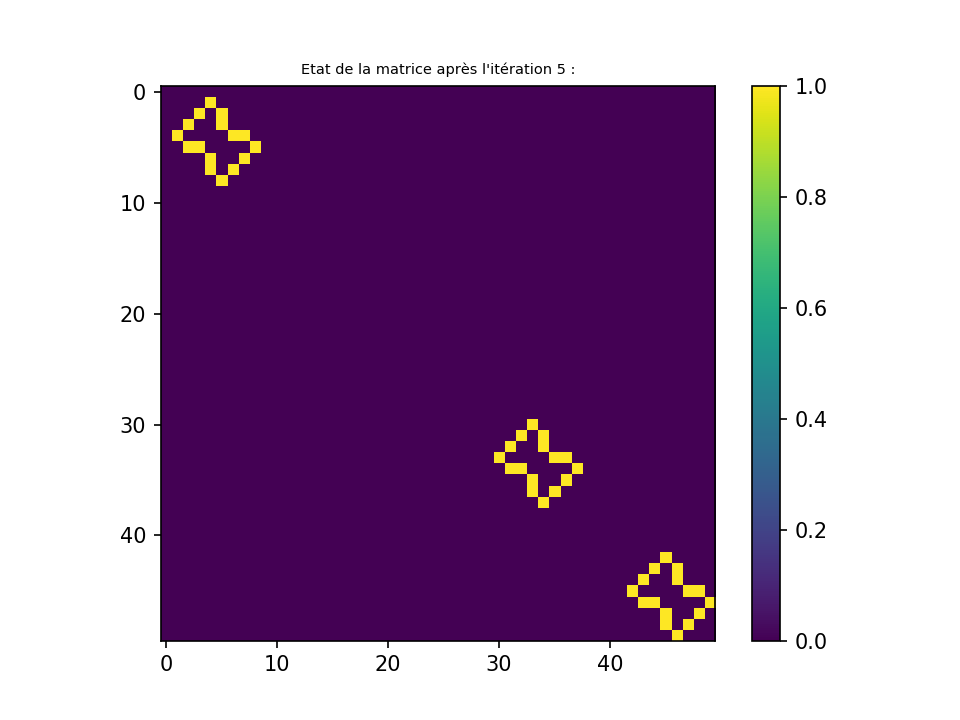

<IPython.core.display.Javascript object>


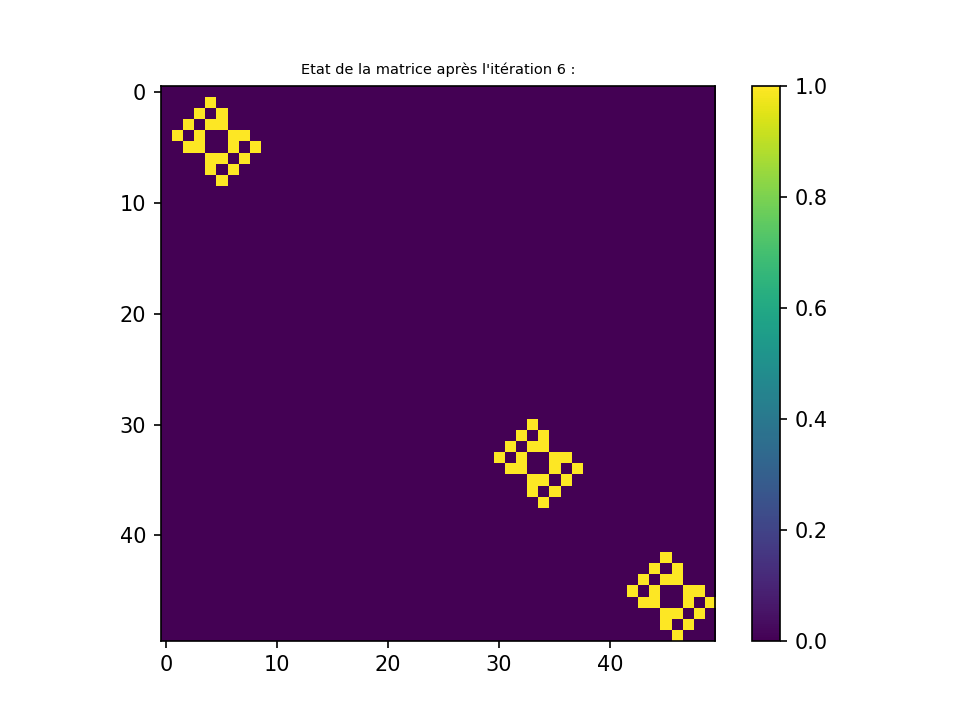

<IPython.core.display.Javascript object>


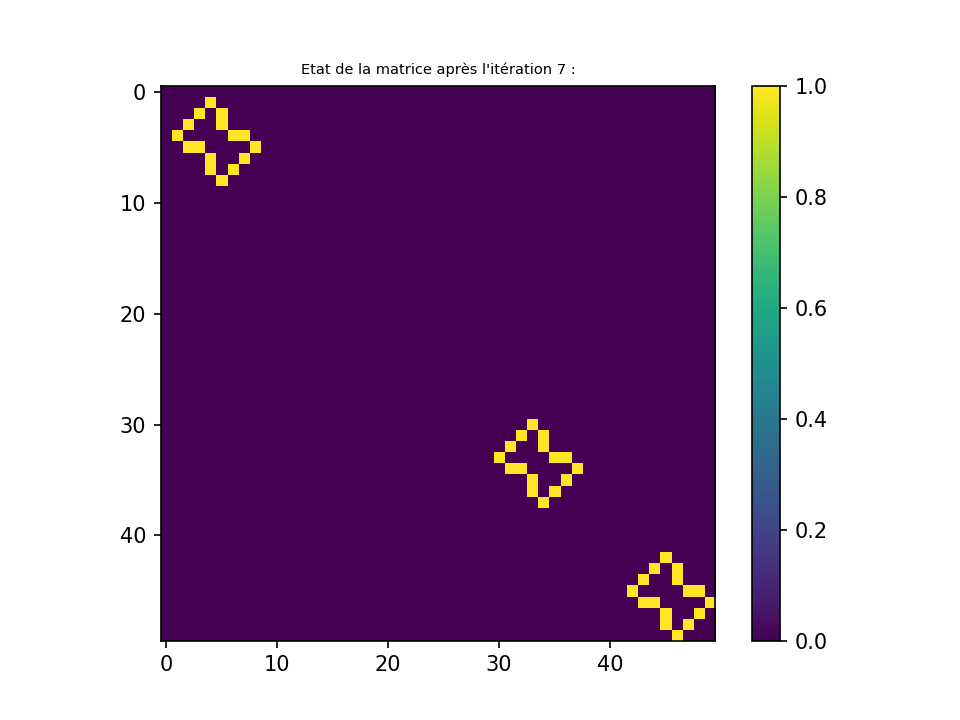

<IPython.core.display.Javascript object>


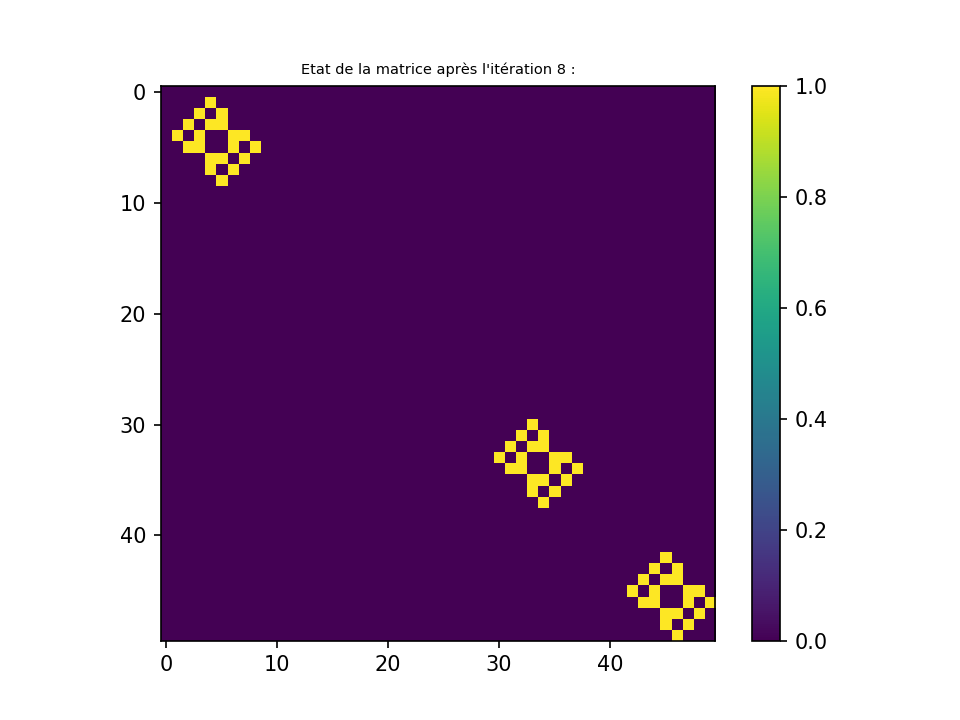

<IPython.core.display.Javascript object>


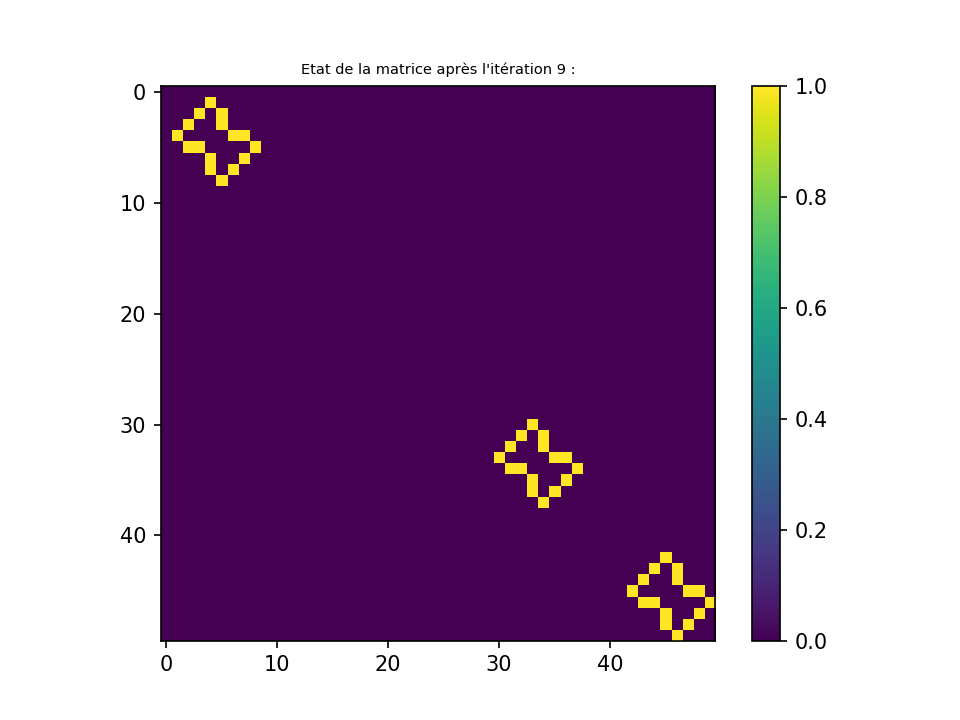

<IPython.core.display.Javascript object>


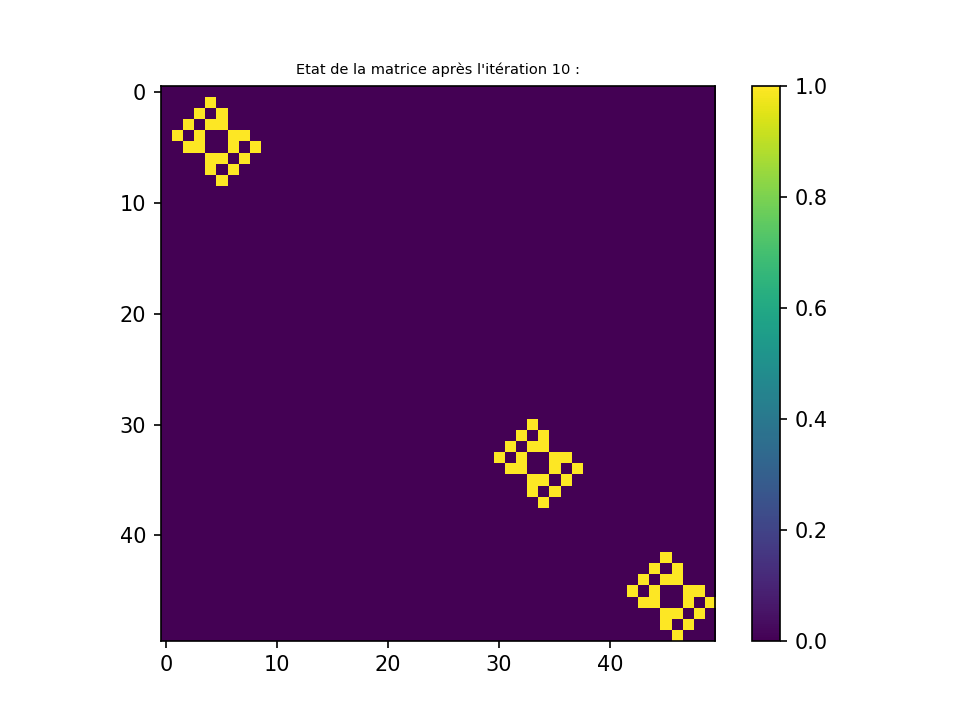

In [17]:
Z_huge = np.zeros((50, 50))
Z_np = np.array(
    [[0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 1, 0, 1, 0, 0, 0],
     [0, 1, 0, 1, 1, 0, 0, 0],
     [1, 0, 1, 0, 0, 1, 1, 0],
     [0, 1, 1, 0, 0, 1, 0, 1],
     [0, 0, 0, 1, 1, 0, 1, 0],
     [0, 0, 0, 1, 0, 1, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0]])
Z_huge[1:9, 1:9] = Z_np
Z_huge[30:38, 30:38] = Z_np
Z_huge[42:50, 42:50] = Z_np

imshow_jeu_de_la_vie(Z_huge)

Question 14:

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


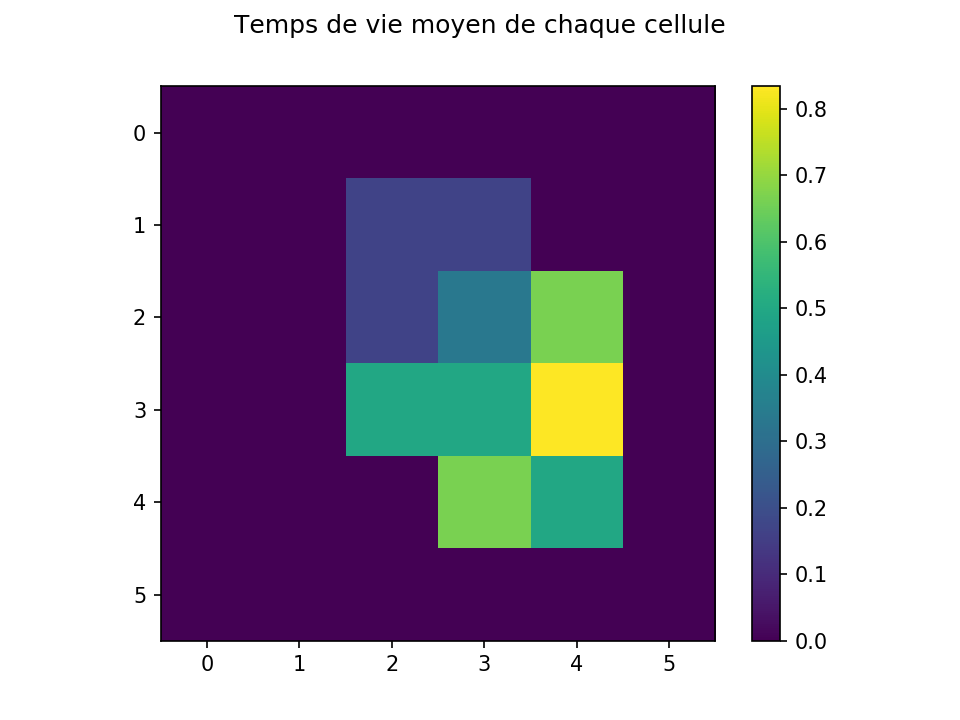

In [18]:
from cindydelageutils import couleur


class Jeu_de_la_vie(object):
    """
        Joue un certain nombre d'itérations du jeu de la vie avec une matrice donnée. Renvoie l'état final de la matrice ainsi qu'une matrice avec le temps moyen de vie de chaque cellule
    """

    def __init__(self, init_state, _time_T):
        # On initialise self:
        self.init_state = init_state
        # On définit self.n_1 et self.n_2 comme les dimensions de la matrice init_state:
        self.n_1 = init_state.shape[0]
        self.n_2 = init_state.shape[1]
        # On crée un tensor:
        self._historic_state = np.ndarray((self.n_1, self.n_2, _time_T+1))
        # On l'initialise:
        self._historic_state[:, :, 0] = self.init_state

    def __play__(self, init_state, _time_T):
        # On crée la matrice qui contiendra les temps de vie moyens de chaque cellule:
        self.average_life = np.zeros((self.n_1, self.n_2))
        for i in range(1, _time_T+1):
            # On a besoin de connaître l'état précédent des cellules:
            self._historic_state[:, :, i-1] = Z
            M = calcul_nb_voisins_np(Z)
            # On reprend la fonction jeu_np en rajoutant deux actualisations: celles des matrices average_life et self._historic_state:
            for x in range(1, self.n_1-1):
                for y in range(1, self.n_2-1):
                    if Z[x, y] == 1 and (M[x, y] < 2 or M[x, y] > 3):
                        Z[x, y] = 0
                    if Z[x, y] == 1 and not(M[x, y] < 2 or M[x, y] > 3):
                        # Si la cellule reste vivante, son temps moyen de vie augmente:
                        self.average_life[x, y] = self.average_life[x, y] + 1
                    elif Z[x, y] == 0 and M[x, y] == 3:
                        # Si la cellule devient vivante, son temps moyen de vie augmente également:
                        Z[x, y] = 1
                        self.average_life[x, y] = self.average_life[x, y] + 1
            # On actualise le tensor:
            self._historic_state[:, :, i] = Z
        # On renvoie l'état final de Z:
        print(self._historic_state[:, :, _time_T])

    def __plot__(self, init_state, _time_T):
        self.average_life = 1/_time_T*self.average_life
        fig, ax = plt.subplots()
        plt.imshow(self.average_life, cmap=couleur())
        fig.suptitle("Temps de vie moyen de chaque cellule")
        plt.colorbar()
        plt.show()


# On vérifie que la classe fonctionne bien en reprenant la matrice Z du début de TP:
Z = np.array([[0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0],
              [0, 1, 0, 1, 0, 0],
              [0, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0]])
a = Jeu_de_la_vie(init_state=Z, _time_T=6)
a.__play__(Z, 6)
a.__plot__(Z, 6)

Question bonus: Les "murs" du jeu sont numérotés 2 dans la matrice. On garde le chiffre 0 pour une cellule morte et le 1 pour une cellule vivante.

In [19]:
def calcul_nb_voisins_np1(Z):
    M = np.zeros((np.shape(Z)[0], np.shape(Z)[1]))
    for x in range(0, np.shape(Z)[0]):
        for y in range(0, np.shape(Z)[1]):
            vect1 = np.array(Z[x])
            nb_vect1 = np.zeros(np.shape(Z)[1])
            nb_vect1[1:-1] += (vect1[:-2] + vect1[2:])
            # On doit maintenant connaître le nombre de voisins des extrémités:
            nb_vect1[0] = vect1[1] + vect1[np.shape(Z)[1] - 1]
            nb_vect1[len(nb_vect1)-1] = vect1[len(nb_vect1)-2] + vect1[0]
            # Les murs ont pour l'instant étaient comptés dans le nombre de voisins, on les retire en listant tous les cas possibles: possibles:
            for i in range(0, len(nb_vect1)):
                if nb_vect1[i] == 2:
                    if vect1[i-1] == 2 or vect1[i+1] == 2:
                        nb_vect1[i] = 0
                if nb_vect1[i] == 3:
                    nb_vect1[i] = 1
                if nb_vect1[i] == 4:
                    nb_vect1[i] = 0
            vect1 = nb_vect1
            vect2 = np.array(Z[:, y])
            nb_vect2 = np.zeros(np.shape(Z)[0])
            nb_vect2[1:-1] += (vect2[:-2] + vect2[2:])
            nb_vect2[0] = vect2[1] + vect2[np.shape(Z)[0] - 1]
            nb_vect2[len(nb_vect2)-1] = vect2[len(nb_vect2)-2] + vect2[0]
            for i in range(0, len(nb_vect2)):
                if nb_vect2[i] == 2:
                    if vect2[i-1] == 2 or vect2[i+1] == 2:
                        nb_vect2[i] = 0
                if nb_vect2[i] == 3:
                    nb_vect2[i] = 1
                if nb_vect2[i] == 4:
                    nb_vect2[i] = 0
            vect2 = nb_vect2
            # Si x est différent de 0, on garde le même fonctionnement, mais si x=0, la ligne précédente est la dernière ligne:
            if x != 0:
                vect3 = np.array(Z[x-1, :])
            if x == 0:
                vect3 = np.array(Z[np.shape(Z)[0]-1, :])
            nb_vect3 = np.zeros(np.shape(Z)[1])
            nb_vect3[1:-1] += (vect3[:-2] + vect3[2:])
            nb_vect3[0] = vect3[1] + vect3[np.shape(Z)[1] - 1]
            nb_vect3[len(nb_vect3)-1] = vect3[len(nb_vect3)-2] + vect3[0]
            for i in range(0, len(nb_vect3)):
                if nb_vect3[i] == 2:
                    if vect3[i-1] == 2 or vect3[i+1] == 2:
                        nb_vect3[i] = 0
                if nb_vect3[i] == 3:
                    nb_vect3[i] = 1
                if nb_vect3[i] == 4:
                    nb_vect3[i] = 0
            vect3 = nb_vect3
            # Le même problème se pose si on a atteint la dernière ligne de la matrice:
            if x != np.shape(Z)[0]-1:
                vect4 = np.array(Z[x+1, :])
            if x == np.shape(Z)[0]-1:
                vect4 = np.array(Z[0, :])
            nb_vect4 = np.zeros(np.shape(Z)[1])
            nb_vect4[1:-1] += (vect4[:-2] + vect4[2:])
            nb_vect4[0] = vect4[1] + vect4[np.shape(Z)[1] - 1]
            nb_vect4[len(nb_vect4)-1] = vect4[len(nb_vect4)-2] + vect4[0]
            for i in range(0, len(nb_vect4)):
                if nb_vect4[i] == 2:
                    if vect4[i-1] == 2 or vect4[i+1] == 2:
                        nb_vect4[i] = 0
                if nb_vect4[i] == 3:
                    nb_vect4[i] = 1
                if nb_vect4[i] == 4:
                    nb_vect4[i] = 0
            vect4 = nb_vect4
            if Z[x, y] != 2:
                M[x, y] = np.sum([vect1[y], vect2[x], vect3[y], vect4[y]])
            # Les murs ont pour l'instant compté comme des cellules normales, donc la valeur 2 a été remplacée par le nombre de cellules vivantes voisines du mur: on annule ce changement.
            if Z[x, y] == 2:
                M[x, y] = 2
    return(M)


# On teste cette nouvelle fonction avec une matrice non carrée et avec des valeurs non nulles sur le pourtour:
Z = np.array([[0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, 0, 0],
              [1, 1, 2, 1, 0, 2],
              [0, 0, 1, 1, 0, 1],
              [1, 2, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0, 0], ])

calcul_nb_voisins_np1(Z)

array([[0., 1., 2., 3., 2., 0.],
       [2., 3., 4., 2., 2., 1.],
       [2., 2., 2., 3., 4., 2.],
       [4., 4., 3., 2., 3., 2.],
       [1., 2., 3., 3., 3., 2.],
       [1., 1., 2., 1., 2., 1.],
       [0., 1., 3., 2., 2., 0.]])

In [20]:
def iteration_jeu_np1(Z):
    # On utilise la nouvelle fonction pour calculer le nombre de voisins:
    M = calcul_nb_voisins_np1(Z)
    # On modifie le nombre d'itérations: les bordures doivent être comptées, contrairement à la version précédente de cette fonction.
    for x in range(0, np.shape(Z)[0]):
        for y in range(0, np.shape(Z)[1]):
            if Z[x, y] == 1 and (M[x, y] < 2 or M[x, y] > 3):
                Z[x, y] = 0
            elif Z[x, y] == 0 and M[x, y] == 3:
                Z[x, y] = 1
    return Z


def jeu_np1(Z_in, nb_iter):
    Z = np.zeros((np.shape(Z_in)[0], np.shape(Z_in)[1]))
    for i in range(1, nb_iter+1):
        # On change la fonction utilisée dans la boucle:
        iteration_jeu_np1(Z_in)
        Z = Z_in
    print(Z)

[[0 0 0 1 0 1]
 [0 0 0 1 1 1]
 [0 0 2 1 0 0]
 [0 0 1 0 0 1]
 [0 2 0 1 1 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]]


C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


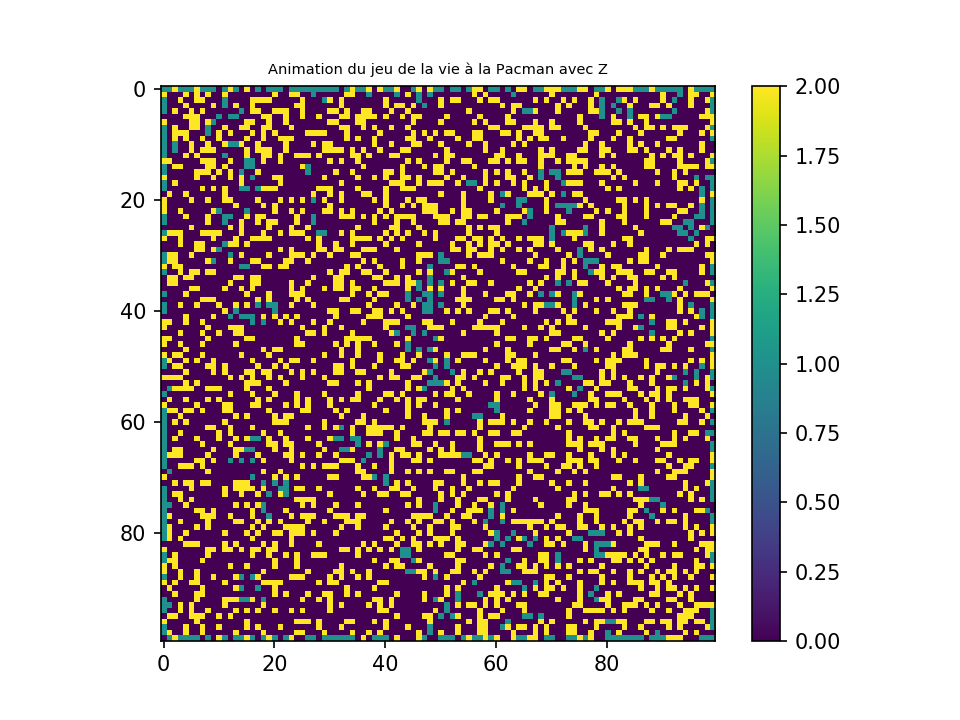

In [21]:
# On définit une matrice non carrée avec certaines cellules vivantes sur le pourtour:
Z = np.array([[0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 1],
              [0, 0, 2, 1, 1, 0],
              [0, 0, 1, 0, 0, 1],
              [0, 2, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 0],
              [0, 1, 0, 1, 1, 0]])

# On vérifie que le jeu fonctionne bien :
jeu_np1(Z, 1)

# On utilise ces nouvelles fonctions pour reprendre la question 12 (cette fois il y a des 2 dans la matrice):

Z = np.random.binomial(2, (1 + ma_graine) * 10 / 100, size=(100, 100))
fig = plt.figure()
im = plt.imshow(Z)


def animate(i):
    jeu_np(Z, 1)
    im = plt.imshow(Z)
    return im,


plt.title("Animation du jeu de la vie à la Pacman avec Z", fontsize=police())
plt.colorbar()
anim = animation.FuncAnimation(fig, animate, 9, blit=False)
plt.show()

# Les cases affichées en violet sont "mortes" (valeur=0), celles en bleu sont "vivantes" (valeur=1) et celles en jaunes représentent les murs